### Notes and References
None yet.




## Setup

### Imports for hosted runtime

In [1]:
%matplotlib inline
#@markdown ###First Cell 
#@markdown *Please paste this cell into any colab notebook for this project.* <br>
#@markdown ***
#@markdown **Contents**: Contents. <br>
#@markdown ***
#@markdown Major Edit History: 
#@markdown - John McCloskey, 7/6: Created as copy of Old Notebook (`Grid Searches`).
#@markdown ***
#@markdown <br> 
#@markdown Please change `FIELDDAY_DIR` if it is located differently in your drive. This cell will error if `FIELDDAY_DIR` is incorrect.
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Change working directory
import os
FIELDDAY_DIR = '/content/drive/My Drive/Field Day' #@param {type:"string"}
INCLUDE_DIR = '/content/drive/My Drive/Field Day/Research and Writing Projects/OGDUtils' #@param (type:"string")
PROJECT_DIR = os.path.join(FIELDDAY_DIR,'Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill')
JUPYTER_DIR = os.path.join(PROJECT_DIR,'Colab')
os.chdir(JUPYTER_DIR)
print(f'---\nCWD: {os.getcwd()}')

#@markdown Change pandas `max_rows` and `max_columns`
import pandas as pd
pd.options.display.max_columns = 100 #@param {type:"integer"}
#pd.options.display.max_columns = 1000
pd.options.display.max_rows = 60 #@param {type:"integer"}

#@markdown *Note: There may be other variables to manually change. Look the "Set Variables" section.*

# import utils
import sys
sys.path.append(INCLUDE_DIR)
#sys.path.append('.')
import utils

Mounted at /content/drive
---
CWD: /content/drive/My Drive/Field Day/Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill/Colab


In [2]:
# jupyter-specific libraries
import ipywidgets as widgets
from google.colab import files
# standard libraries
import numpy as np
import pandas as pd
from math import ceil
from matplotlib import pyplot as plt
from scipy import stats
from collections import Counter
from io import BytesIO
from zipfile import ZipFile
import importlib
import urllib.request
# custom libraries
import jowilder_utils as jw_util
import feature_utils as feat_util
# machine learning libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline as sklearn_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, RepeatedEditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from xgboost import XGBClassifier
import copy
import seaborn as sns

importlib.reload(feat_util)
importlib.reload(jw_util)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


<module 'jowilder_utils' from '/content/drive/My Drive/Field Day/Research and Writing Projects/OGDUtils/jowilder_utils.py'>

#### Set csv_path to use (optional)

In [ ]:
csv_reldir = "Output Data" #@param {type:"string"}
csv_fname = "JM_202006101052_with_nans.csv" #@param {type:"string"}
csv_path = os.path.join(csv_reldir, csv_fname)
print('Open from:', csv_path)
print('Other files in dir:', ''.join([
        f'\n{f}' for f in os.listdir(csv_reldir) if f.endswith('sv')]))

Open from: Output Data/JM_202006101052_with_nans.csv
Other files in dir: 
JM_202006041215_filtered_obj_feats.csv
JM_202006080931_filtered_obj_feats.csv
JM_202006090933_filtered_obj_feats.csv
JM_202006101044_filtered_obj_feats.csv
JM_202006101052_with_nans.csv
JM_202006101204_throughAss2_wNaN.csv
JM_202006101204_all_wNaN.csv
JM_202006101204_all_woutNaN.csv
JM_202006101204_all_woutNaN_selected_for_R0_SVM_with_oversampling.csv
JM_202006101204_all_woutNaN_selected_for_R1_SVM_with_oversampling.csv
JM_202006101204_all_woutNaN_selected_for_R2_SVM_with_oversampling.csv
JM_202006101204_all_woutNaN_selected_for_R0_SVM.csv
JM_202006101204_all_woutNaN_selected_for_R1_SVM.csv
JM_202006101204_all_woutNaN_selected_for_R2_SVM.csv
JM_202006101204_all_woutNaN_selected_for_R0_Lasso.csv
JM_202006101204_all_woutNaN_selected_for_R1_Lasso.csv
JM_202006101204_all_woutNaN_selected_for_R2_Lasso.csv
JM_202006101204_all_woutNaN_selected_for_R0_Lasso_with_oversampling.csv
JM_202006101204_all_woutNaN_selected_for_R

### Imports for local runtime

Set INCLUDE_DIR for the OGDUtils modules

In [ ]:
INCLUDE_DIR = r"C:\Users\johnm\Development\FieldDay\OGDUtils" ## CHANGE THIS

In [ ]:
# specific to local john computer
import sys
sys.path.append(INCLUDE_DIR)

# standard libraries
import numpy as np
import pandas as pd
import os

from math import ceil
from matplotlib import pyplot as plt
from scipy import stats
from collections import Counter
from io import BytesIO
from zipfile import ZipFile
import importlib
import urllib.request
# custom libraries
import jowilder_utils as jw_util
import feature_utils as feat_util
# machine learning libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline as sklearn_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, RepeatedEditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from xgboost import XGBClassifier
from sklearn.preprocessing import KBinsDiscretizer

import copy

importlib.reload(feat_util)
importlib.reload(jw_util)

<module 'jowilder_utils' from 'C:\\Users\\johnm\\Development\\FieldDay\\OGDUtils\\jowilder_utils.py'>

In [ ]:
csv_path = r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202007061150_fullThroughJune_withUnreached_obj-_thresh0_0.csv"
df, meta = feat_util.open_csv_from_path_with_meta(csv_path)

In [ ]:
jw_util.JWWindowSelector.LEVEL

1

In [ ]:
importlib.reload(feat_util)
importlib.reload(jw_util)
print(meta)

["Using feats: ['lvl1_EventCount', 'lvl1_avg_time_between_clicks', 'lvl1_count_clicks', 'lvl1_count_hovers', 'lvl1_count_notebook_uses', 'lvl1_first_enc_avg_tbps', 'lvl1_first_enc_avg_wps', 'lvl1_first_enc_boxes_read', 'lvl1_first_enc_duration', 'lvl1_first_enc_var_tbps', 'lvl1_first_enc_var_wps', 'lvl1_first_enc_words_read', 'lvl1_meaningful_action_count', 'lvl1_num_enc', 'lvl1_time_in_level']", "*arg* filter_args = {'query_list': ['R1_quiz_response == R1_quiz_response', 'lvl1_first_enc_duration == lvl1_first_enc_duration', 'lvl1_first_enc_duration > 0', 'lvl1_time_in_level < 1200', 'lvl1_time_in_level > 0', 'R0_quiz_response == R0_quiz_response', 'R1_quiz_response == R1_quiz_response', 'R2_quiz_response == R2_quiz_response'], 'one_query': False, 'fillna': None, 'verbose': True}", 'Query: Intial Shape, output_shape: (46852, 27)', 'Query: R1_quiz_response == R1_quiz_response, output_shape: (46848, 27)', 'Query: lvl1_first_enc_duration == lvl1_first_enc_duration, output_shape: (41916, 2

In [ ]:
window_selector = jw_util.JWWindowSelector(df=df, meta=meta)

In [ ]:
df['Q0_A1_nan']

sessionID
19110000090781600    0
19110008122038204    0
19110008501053136    0
19110009114094480    0
19110009240104090    0
                    ..
20050623142103304    0
20050623165712520    1
20060307202705492    1
20060310431252852    1
20060310454980960    1
Name: Q0_A1_nan, Length: 46852, dtype: int64

In [ ]:
X, Y, meta = window_selector.get_X_Y_meta_range([1,10], window_type=jw_util.JWWindowSelector.QUIZ)
print(*meta,sep='\n')

Query: Intial Shape, output_shape: (46852, 31)
Query: R1_quiz_response == R1_quiz_response, output_shape: (46848, 31)
Query: Q1_A1_nan!=1, output_shape: (25462, 31)
Query: R0_quiz_response == R0_quiz_response, output_shape: (25462, 31)
Query: R1_quiz_response == R1_quiz_response, output_shape: (25462, 31)
Query: R2_quiz_response == R2_quiz_response, output_shape: (25462, 31)
Query: Intial Shape, output_shape: (46852, 73)
Query: R1_quiz_response == R1_quiz_response, output_shape: (46848, 73)
Query: Q10_A1_nan!=1, output_shape: (13798, 73)
Query: R0_quiz_response == R0_quiz_response, output_shape: (13798, 73)
Query: R1_quiz_response == R1_quiz_response, output_shape: (13798, 73)
Query: R2_quiz_response == R2_quiz_response, output_shape: (13798, 73)
Using feats: ['Q1_A1_time', 'Q1_A2_time', 'Q1_A3_time', 'Q1_num_guesses', 'Q1_A1_A', 'Q1_A1_B', 'Q1_A1_C', 'Q1_A1_D', 'Q1_A1_nan', 'Q1_A2_A', 'Q1_A2_B', 'Q1_A2_C', 'Q1_A2_D', 'Q1_A2_nan', 'Q1_A3_A', 'Q1_A3_B', 'Q1_A3_C', 'Q1_A3_D', 'Q1_A3_nan'

In [ ]:
tX, tY, tmeta = window_selector.get_X_Y_meta(0, window_type=jw_util.JWWindowSelector.LEVEL)

Query: Intial Shape, output_shape: (46852, 27)
Query: R1_quiz_response == R1_quiz_response, output_shape: (46848, 27)
Query: lvl0_first_enc_duration == lvl0_first_enc_duration, output_shape: (46613, 27)
Query: lvl0_first_enc_duration > 0, output_shape: (46612, 27)
Query: lvl0_time_in_level < 1200, output_shape: (46411, 27)
Query: lvl0_time_in_level > 0, output_shape: (46411, 27)
Query: R0_quiz_response == R0_quiz_response, output_shape: (46411, 27)
Query: R1_quiz_response == R1_quiz_response, output_shape: (46411, 27)
Query: R2_quiz_response == R2_quiz_response, output_shape: (46411, 27)


In [ ]:
len(range(5))

5

In [ ]:
X.shape, tX.shape

((13797, 78), (46411, 12))

In [ ]:
range(80)[-1]

79

In [ ]:
group_size = 1
window_range = range(80)
[range(i,i+group_size) for i in range(window_range[-1]+2)[:-group_size]]

[range(0, 1),
 range(1, 2),
 range(2, 3),
 range(3, 4),
 range(4, 5),
 range(5, 6),
 range(6, 7),
 range(7, 8),
 range(8, 9),
 range(9, 10),
 range(10, 11),
 range(11, 12),
 range(12, 13),
 range(13, 14),
 range(14, 15),
 range(15, 16),
 range(16, 17),
 range(17, 18),
 range(18, 19),
 range(19, 20),
 range(20, 21),
 range(21, 22),
 range(22, 23),
 range(23, 24),
 range(24, 25),
 range(25, 26),
 range(26, 27),
 range(27, 28),
 range(28, 29),
 range(29, 30),
 range(30, 31),
 range(31, 32),
 range(32, 33),
 range(33, 34),
 range(34, 35),
 range(35, 36),
 range(36, 37),
 range(37, 38),
 range(38, 39),
 range(39, 40),
 range(40, 41),
 range(41, 42),
 range(42, 43),
 range(43, 44),
 range(44, 45),
 range(45, 46),
 range(46, 47),
 range(47, 48),
 range(48, 49),
 range(49, 50),
 range(50, 51),
 range(51, 52),
 range(52, 53),
 range(53, 54),
 range(54, 55),
 range(55, 56),
 range(56, 57),
 range(57, 58),
 range(58, 59),
 range(59, 60),
 range(60, 61),
 range(61, 62),
 range(62, 63),
 range(63, 

In [ ]:
os.path.splitext('./hello')

('./hello', '')

In [ ]:
jw_util.GridSearcher(df=XY, meta=meta, expect_bool_cols=False, preprocessor=StandardScaler())

In [ ]:
df["int47_ifirst_enc_words_read"].max() is np.nan

True

In [ ]:
df_cols = list(df.columns)
ycols = ['R0_quiz_response','R1_quiz_response','R2_quiz_response','R1_quiz_response_bin',
         'R1_quiz_response_0v12','R1_quiz_response_01v2','R1_quiz_response_bin_x',
         'R2_quiz_response_bin','R2_quiz_response_bin_x','R2_quiz_response_bin0v123',
         'R2_quiz_response_bin01v23','R2_quiz_response_bin012v3']
def cols_startwith(prefix):
    return [c for c in df_cols if c.startswith(prefix)]
def int_feats(int_n):
    feats = cols_startwith(f'int{int_n}_')
    if int_n < 80:
        feats.extend(cols_startwith(f'obj{int_n}_'))
    return feats
def q_feats(q_n):
    feats = cols_startwith(f'Q{q_n}_')
    return feats
def lvl_feats(lvl_n):
    feats = cols_startwith(f'lvl{lvl_n}_')
    return feats
def get_intXYMeta(int_n, max_seconds_per_word=2,nbins=5):
    meta = []
    Xfeats = int_feats(int_n)
    num_words = df[f"int{int_n}_ifirst_enc_words_read"].max()
    meta.append("")
    queries = [f"R1_quiz_response == R1_quiz_response",
               f"int{int_n}_itotal_duration == int{int_n}_itotal_duration",
               f"int{int_n}_itotal_duration > 0",
               f"int{int_n}_ifirst_enc_words_read == {num_words}",
               f"int{int_n}_itime_to > 0",
               f"int{int_n}_ifirst_enc_duration < int{int_n}_ifirst_enc_words_read*{max_seconds_per_word}",
            #    f"int{int_n}_itotal_duration < int{int_n}_ifirst_enc_words_read*int{int_n}_inum_enc*{max_seconds_per_word}",

               ]
    if int_n < 80:
        queries.append(f'obj{int_n}_onext_int_nan==0')
        queries.append(f"obj{int_n}_otime_to_next_obj < 600")
        queries.append(f"obj{int_n}_otime_to_next_obj > 0 ")
    filtered_df, filtered_df_meta = feat_util.filter_df(df[Xfeats+ycols], query_list=queries, verbose=True, fillna=None)
    meta.extend(filtered_df_meta)
    intX = filtered_df[Xfeats].fillna(0).copy()
    intY = filtered_df[ycols].copy()
    drop_cols = [
        f"int{int_n}_ifirst_enc_boxes_read",
        f"int{int_n}_ifirst_enc_words_read",
        f"int{int_n}_itime_to",
        f"int{int_n}_itotal_duration"
    ]
    if int_n < 80:
        drop_cols.append(f"obj{int_n}_onext_int_nan")
    intX = intX.drop(columns=drop_cols)
    meta.append(f"Dropped drop_cols: {drop_cols}")
    constant_cols = intX.columns[intX.nunique()==1]
    intX = intX.drop(columns=constant_cols)
    meta.append(f'Dropped constant_cols: {constant_cols}')
    bool_cols = [c for c in intX.columns if 'next_int' in c]
    if bool_cols:
        intX = intX.drop(columns=bool_cols[0])
        meta.append(f'Dropped onehot column {bool_cols[0]} from {bool_cols}')
        if nbins:
            est = KBinsDiscretizer(n_bins=nbins, encode='onehot-dense', strategy='quantile')
            bin_feats = [f'int{int_n}_ifirst_enc_avg_tbps', 
                        f'int{int_n}_ifirst_enc_avg_wps',
                        f'int{int_n}_ifirst_enc_duration',
                        f'int{int_n}_ifirst_enc_var_tbps',
                        f'int{int_n}_ifirst_enc_var_wps']
            bin_feats = [c for c in bin_feats if c in intX.columns]
            if bin_feats:
                    
                Xt = est.fit_transform(intX[bin_feats])
                new_feat_names = [f'{feat}>{x:.2f}' for bins,feat in zip(est.bin_edges_,bin_feats) for x in list(bins)[:-1]]

                Xt_df = pd.DataFrame(Xt, index=intX.index, columns=new_feat_names)
                intX = intX.join(Xt_df)
                intX = intX.drop(columns=bin_feats)
                meta.append(f'Quantized n_bins=5 feats {bin_feats} to {new_feat_names}')
        

    return (intX, intY, meta)
def corr_heatmap(df,figsize=(20,20),max_corr=.3):
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=max_corr, vmin=-1*max_corr, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
# intX, intY, intX_meta = get_intXYMeta(8)
# print(*intX_meta,sep='\n')

Query: Intial Shape, output_shape: (46852, 30)
Query: R1_quiz_response == R1_quiz_response, output_shape: (46848, 30)
Query: int8_itotal_duration == int8_itotal_duration, output_shape: (25978, 30)
Query: int8_itotal_duration > 0, output_shape: (25977, 30)
Query: int8_ifirst_enc_words_read == 43.0, output_shape: (24932, 30)
Query: int8_itime_to > 0, output_shape: (24929, 30)
Query: int8_ifirst_enc_duration < int8_ifirst_enc_words_read*2, output_shape: (24812, 30)
Query: obj8_onext_int_nan==0, output_shape: (24699, 30)
Query: obj8_otime_to_next_obj < 600, output_shape: (24683, 30)
Query: obj8_otime_to_next_obj > 0 , output_shape: (24683, 30)

*arg* filter_args = {'query_list': ['R1_quiz_response == R1_quiz_response', 'int8_itotal_duration == int8_itotal_duration', 'int8_itotal_duration > 0', 'int8_ifirst_enc_words_read == 43.0', 'int8_itime_to > 0', 'int8_ifirst_enc_duration < int8_ifirst_enc_words_read*2', 'obj8_onext_int_nan==0', 'obj8_otime_to_next_obj < 600', 'obj8_otime_to_next_obj 

In [ ]:
False + True

1

In [ ]:
def get_filter_queries(n,level=False,interaction=False, max_seconds_per_word=2):
    assert level + interaction
    prefix = f'int{n}_i' if interaction else f'lvl{n}_'
    queries = []
    queries.extend([
                f"R1_quiz_response == R1_quiz_response",
                f"{prefix}first_enc_duration == {prefix}first_enc_duration",
                f"{prefix}first_enc_duration > 0",
    ])
    if interaction:
        num_words = df[f"int{n}_ifirst_enc_words_read"].max()
        queries.extend([
                f"{prefix}first_enc_words_read == {num_words}",
                f"{prefix}time_to > 0",
                f"{prefix}first_enc_duration < {prefix}first_enc_words_read*{max_seconds_per_word}",
                ])
        if n < 80:
            queries.append(f"obj{n}_otime_to_next_obj < 600")
            queries.append(f"obj{n}_otime_to_next_obj > 0 ")
        if n < 79:
            queries.append(f'obj{n}_onext_int_nan==0')

    elif level:
        queries.append(f"{prefix}time_in_level < 1200")
        queries.append(f"{prefix}time_in_level > 0")

    return queries
def get_XYMeta(n,level=False,interaction=False, max_seconds_per_word=2,nbins=0):
    assert level + interaction
    meta = []
    prefix = f'int{n}_i' if interaction else f'lvl{n}_'
    if interaction:
        Xfeats = int_feats(n)
    if level:
        Xfeats = lvl_feats(n)
    queries = get_filter_queries(n,level=level,interaction=interaction, max_seconds_per_word=max_seconds_per_word)
    filtered_df, filtered_df_meta = feat_util.filter_df(df[Xfeats+ycols], query_list=queries, verbose=False, fillna=None)
    meta.extend(filtered_df_meta)
    X = filtered_df[Xfeats].fillna(0).copy()
    Y = filtered_df[ycols].copy()
    drop_cols = [
        f"{prefix}first_enc_boxes_read",
        f"{prefix}first_enc_words_read",
    ]
    if interaction:
        drop_cols.extend([
        f"{prefix}time_to",
        f"{prefix}total_duration"
        ])
        if n < 80:
            drop_cols.append(f"obj{n}_onext_int_nan")

    X = X.drop(columns=drop_cols)
    meta.append(f"Dropped drop_cols: {drop_cols}")
    constant_cols = X.columns[X.nunique()==1]
    X = X.drop(columns=constant_cols)
    meta.append(f'Dropped constant_cols: {constant_cols}')
    if not len(X):
        return None, None, meta 
    bool_cols = [c for c in X.columns if 'next_int' in c]
    if bool_cols:
        X = X.drop(columns=bool_cols[0])
        meta.append(f'Dropped onehot column {bool_cols[0]} from {bool_cols}')

    ## does not bin by default
    if nbins:
        est = KBinsDiscretizer(n_bins=nbins, encode='onehot-dense', strategy='quantile')
        bin_feats = [f'{prefix}first_enc_avg_tbps', 
                    f'{prefix}first_enc_avg_wps',
                    # f'{prefix}first_enc_duration',
                    f'{prefix}first_enc_var_tbps',
                    f'{prefix}first_enc_var_wps']
        bin_feats = [c for c in bin_feats if c in X.columns]
        if bin_feats:
                
            Xt = est.fit_transform(X[bin_feats])
            new_feat_names = [f'{feat}>{x:.2f}' for bins,feat in zip(est.bin_edges_,bin_feats) for x in list(bins)[:-1]]

            Xt_df = pd.DataFrame(Xt, index=X.index, columns=new_feat_names)
            X = X.join(Xt_df)
            X = X.drop(columns=bin_feats)
            meta.append(f'Quantized n_bins=5 feats {bin_feats} to {new_feat_names}')
    return (X, Y, meta)

In [ ]:
n=20
X, Y, meta = get_XYMeta(n, level=True)
meta

["*arg* filter_args = {'query_list': ['R1_quiz_response == R1_quiz_response', 'lvl20_first_enc_duration == lvl20_first_enc_duration', 'lvl20_first_enc_duration > 0', 'lvl20_time_in_level < 1200', 'lvl20_time_in_level > 0'], 'one_query': False, 'fillna': None, 'verbose': False}",
 'Query: Intial Shape, output_shape: (46852, 27)',
 'Query: R1_quiz_response == R1_quiz_response, output_shape: (46848, 27)',
 'Query: lvl20_first_enc_duration == lvl20_first_enc_duration, output_shape: (8988, 27)',
 'Query: lvl20_first_enc_duration > 0, output_shape: (8988, 27)',
 'Query: lvl20_time_in_level < 1200, output_shape: (8865, 27)',
 'Query: lvl20_time_in_level > 0, output_shape: (8865, 27)',
 "Dropped drop_cols: ['lvl20_first_enc_boxes_read', 'lvl20_first_enc_words_read']",
 "Dropped constant_cols: Index([], dtype='object')"]

In [ ]:
X.describe()

lvl20_EventCount  lvl20_avg_time_between_clicks  lvl20_count_clicks  \
count       8865.000000                    8865.000000         8865.000000   
mean          64.441060                       2.093211           41.683474   
std           61.021915                       2.244778           45.242804   
min            6.000000                       0.327029            4.000000   
25%           39.000000                       1.365758           23.000000   
50%           48.000000                       1.797773           29.000000   
75%           64.000000                       2.318282           41.000000   
max         1153.000000                     120.026000          897.000000   

       lvl20_count_hovers  lvl20_count_notebook_uses  \
count         8865.000000                8865.000000   
mean            22.730513                   0.558714   
std             20.340960                   1.041539   
min              0.000000                   0.000000   
25%             15.000000                   0.000000   
50%             19.000000                   0.000000   
75%             25.000000                   1.000000   
max            415.000000                  13.000000   

       lvl20_first_enc_avg_tbps  lvl20_first_enc_avg_wps  \
count               8865.000000              8865.000000   
mean                   7.920440                68.551421   
std                   22.561347               197.751101   
min                    0.000000                 0.000000   
25%                    2.435277                21.207690   
50%                    3.526934                30.552253   
75%                    5.851212                50.849279   
max                 1000.000000              9000.000000   

       lvl20_first_enc_duration  lvl20_first_enc_var_tbps  \
count               8865.000000               8865.000000   
mean                  14.469976               2271.149701   
std                   28.083774              14866.687040   
min                    0.176000                  0.000000   
25%                    7.884000                  1.591883   
50%                   11.035000                  8.010093   
75%                   15.109000                 52.407508   
max                  943.420000             221612.156811   

       lvl20_first_enc_var_wps  lvl20_meaningful_action_count  lvl20_num_enc  \
count             8.865000e+03                    8865.000000    8865.000000   
mean              1.716257e+05                       9.055612       2.912465   
std               1.178324e+06                       9.440195       2.033232   
min               0.000000e+00                       1.000000       1.000000   
25%               1.195684e+02                       5.000000       2.000000   
50%               6.020691e+02                       6.000000       2.000000   
75%               4.259197e+03                       9.000000       3.000000   
max               1.844219e+07                     170.000000      50.000000   

       lvl20_time_in_level  
count          8865.000000  
mean             77.274708  
std              89.097510  
min               2.684000  
25%              40.450000  
50%              54.016000  
75%              77.822000  
max            1141.453000

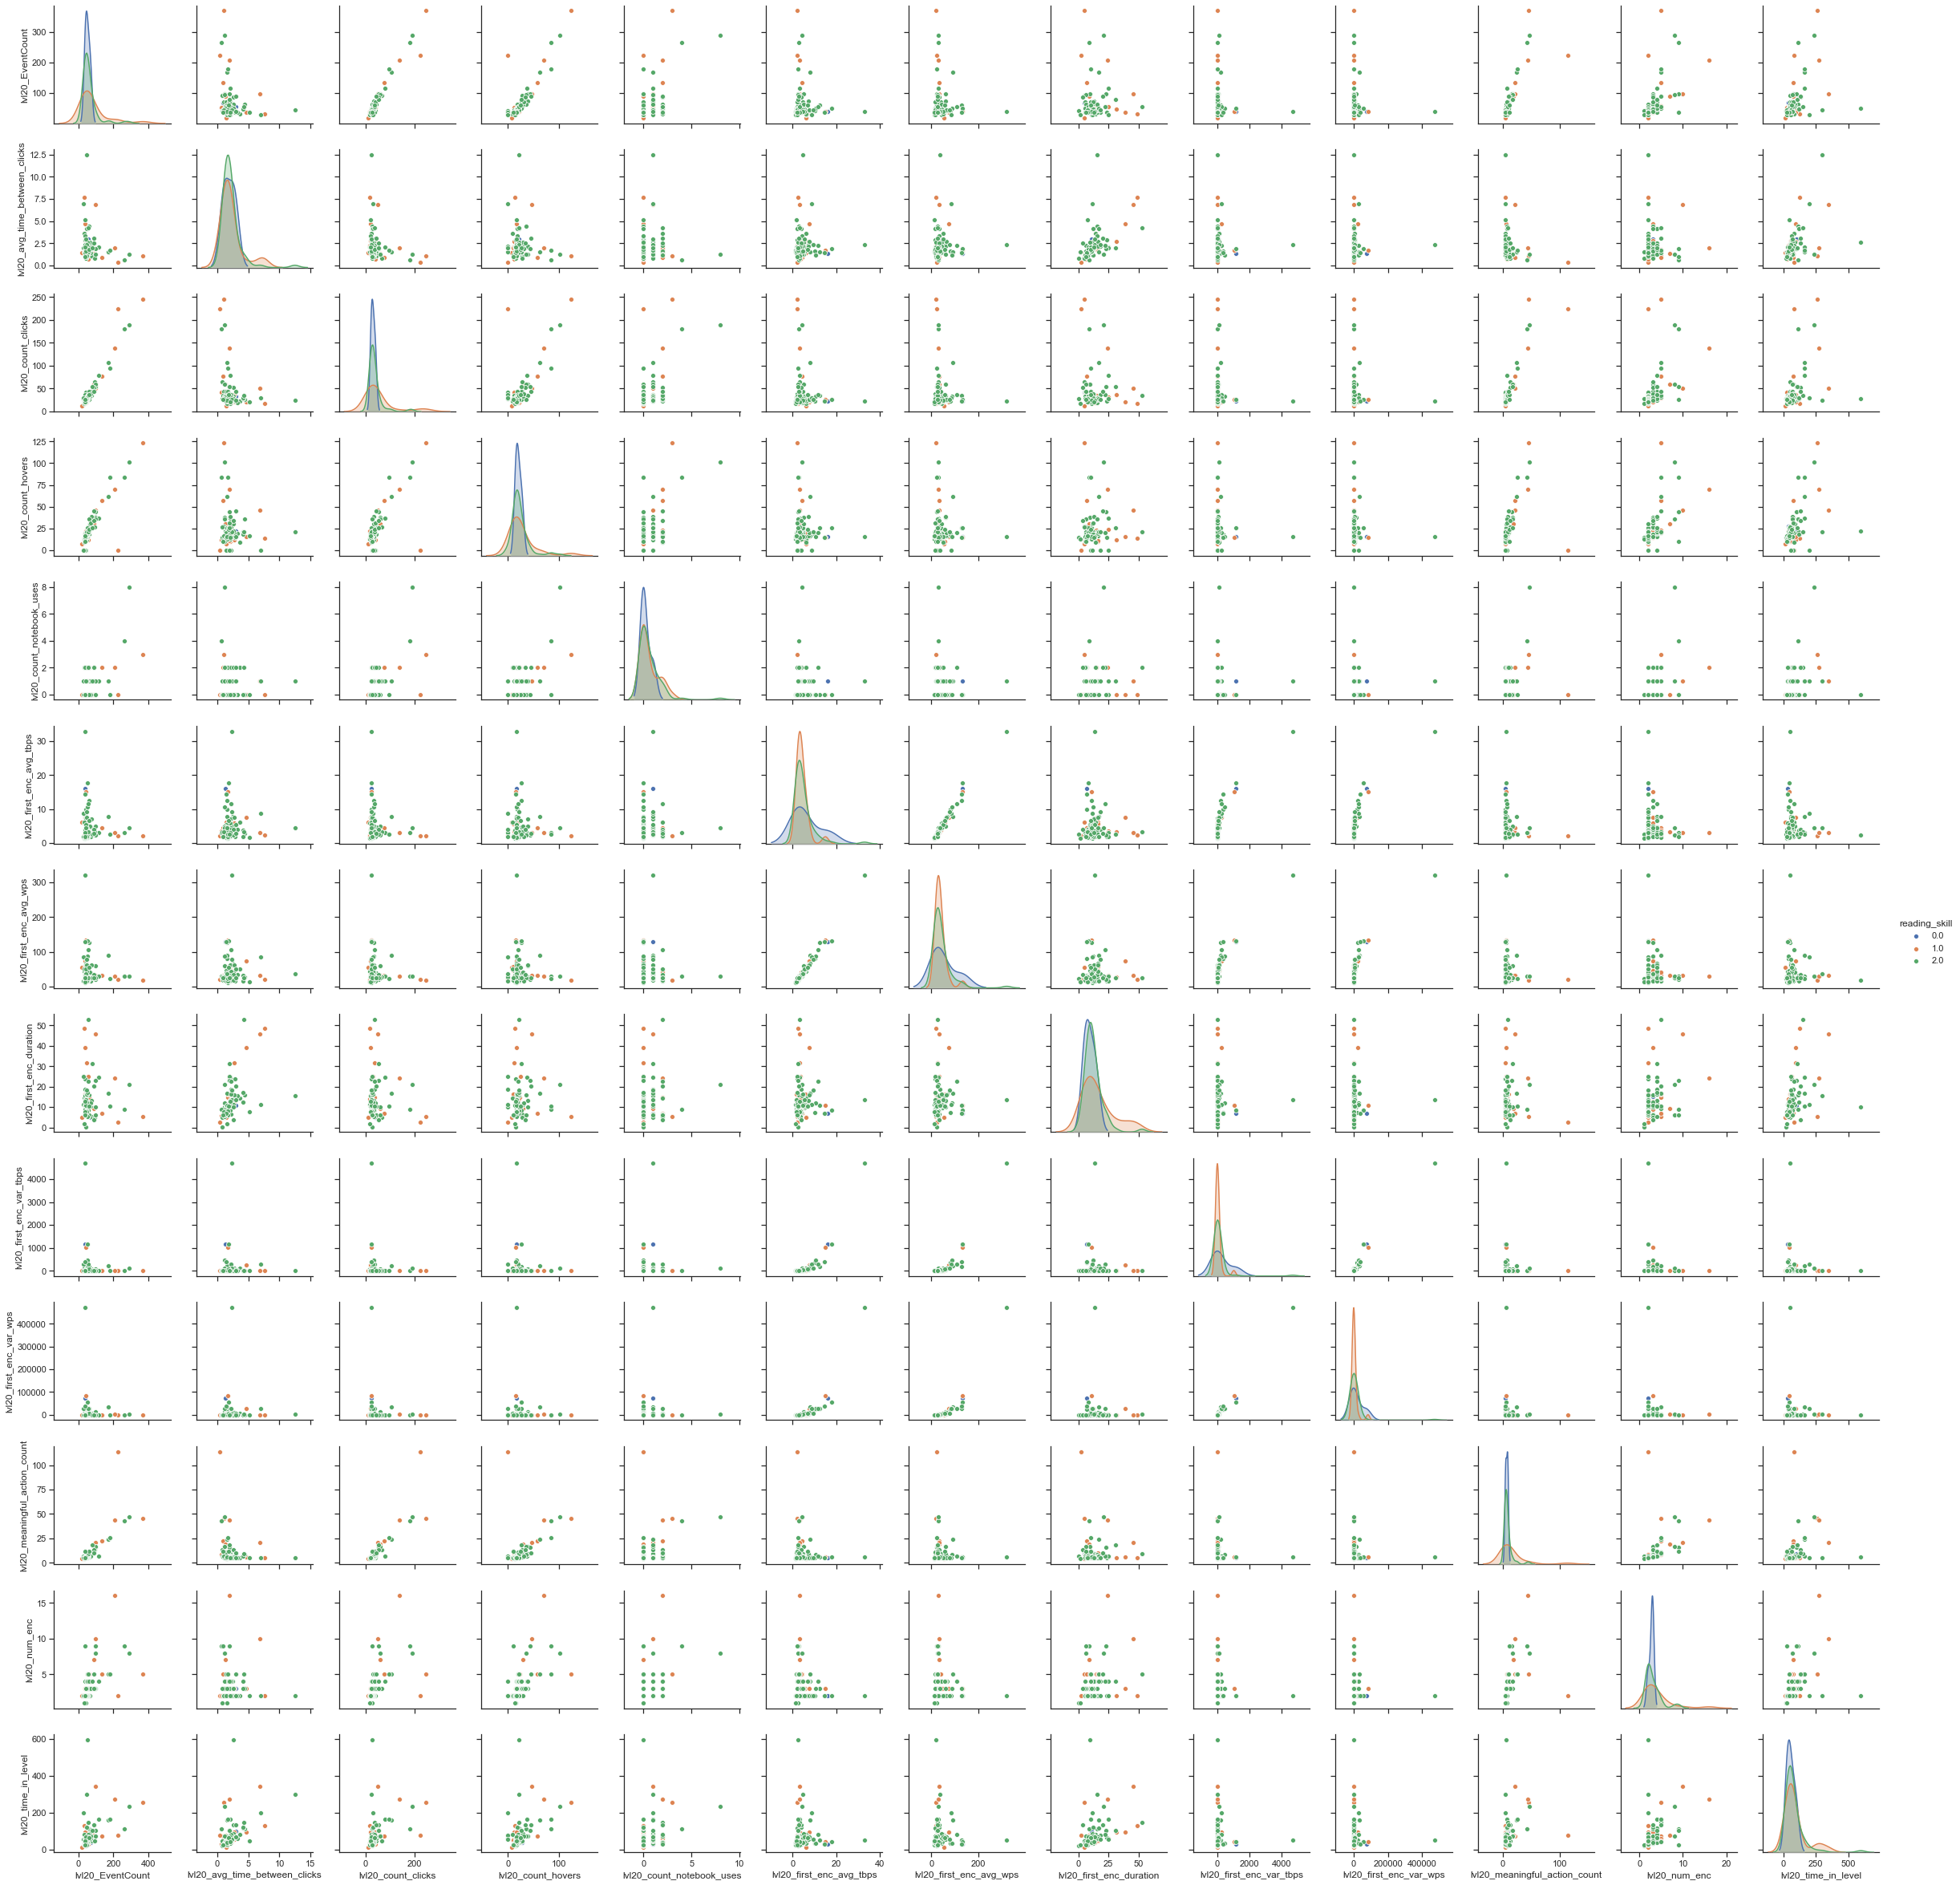

In [ ]:
gX = X.copy()
gX['reading_skill'] = Y['R1_quiz_response']
sns.pairplot(gX.iloc[:100,:], hue='reading_skill')

In [ ]:
outdf = Y.copy()
y = Y['R1_quiz_response_01v2']
clf = make_pipeline(RandomOverSampler(), StandardScaler(), XGBClassifier())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_df = pd.DataFrame(data={f'real_{n}':y_test,f'pred_{n}':clf.predict(X_test),f'test_{n}':1}).append(
    pd.DataFrame(data={f'real_{n}':y_train,f'pred_{n}':clf.predict(X_train),f'test_{n}':0}), 
)
metric_df
outdf.join(pred_df).query('test_20==1')

R0_quiz_response  R1_quiz_response  R2_quiz_response  \
sessionID                                                                 
19110000090781600               0.0               1.0               1.0   
19110020180962532               0.0               2.0               0.0   
19110108105154360               0.0               2.0               0.0   
19110108382264400               0.0               2.0               0.0   
19110108450696270               0.0               2.0               0.0   
...                             ...               ...               ...   
20050619073644190               0.0               2.0               1.0   
20050619094491850               0.0               2.0               0.0   
20050619120355750               0.0               2.0               0.0   
20050620502380640               0.0               1.0               0.0   
20050620524629052               1.0               2.0               0.0   

                   R1_quiz_response_bin  R1_quiz_response_0v12  \
sessionID                                                        
19110000090781600                   0.0                    1.0   
19110020180962532                   1.0                    1.0   
19110108105154360                   1.0                    1.0   
19110108382264400                   1.0                    1.0   
19110108450696270                   1.0                    1.0   
...                                 ...                    ...   
20050619073644190                   1.0                    1.0   
20050619094491850                   1.0                    1.0   
20050619120355750                   1.0                    1.0   
20050620502380640                   0.0                    1.0   
20050620524629052                   1.0                    1.0   

                   R1_quiz_response_01v2  R1_quiz_response_bin_x  \
sessionID                                                          
19110000090781600                    0.0                     NaN   
19110020180962532                    1.0                     1.0   
19110108105154360                    1.0                     1.0   
19110108382264400                    1.0                     1.0   
19110108450696270                    1.0                     1.0   
...                                  ...                     ...   
20050619073644190                    1.0                     1.0   
20050619094491850                    1.0                     1.0   
20050619120355750                    1.0                     1.0   
20050620502380640                    0.0                     NaN   
20050620524629052                    1.0                     1.0   

                   R2_quiz_response_bin  R2_quiz_response_bin_x  \
sessionID                                                         
19110000090781600                   0.0                     NaN   
19110020180962532                   0.0                     0.0   
19110108105154360                   0.0                     0.0   
19110108382264400                   0.0                     0.0   
19110108450696270                   0.0                     0.0   
...                                 ...                     ...   
20050619073644190                   0.0                     NaN   
20050619094491850                   0.0                     0.0   
20050619120355750                   0.0                     0.0   
20050620502380640                   0.0                     0.0   
20050620524629052                   0.0                     0.0   

                   R2_quiz_response_bin0v123  R2_quiz_response_bin01v23  \
sessionID                                                                 
19110000090781600                        1.0                        0.0   
19110020180962532                        0.0                        0.0   
19110108105154360                        0.0                        0.0   
19110108382264400                        0.0        

In [ ]:
def f1(prec, recall): 
    return fb(prec, recall, beta=1)
def fb(prec, recall, beta=1):
    if prec==0 or recall==0:
        return 0
    numerator = prec*recall
    denominator = prec*beta*beta + recall
    return (1+beta*beta)*numerator/denominator
def f2(prec, recall):
    return fb(prec,recall,beta=2)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]
Xarray = X_test
yarray = y_test
metric_list = []
auc = roc_auc_score(y_true=yarray, y_score=y_prob)
metric_list.append((auc, f'{label}_AUC'))
f1macro = f1_score(y_true=yarray, y_pred=y_pred, average='macro')
metric_list.append((f1macro, f'{label}_f1_avg'))
acc = accuracy_score(y_true=yarray, y_pred=y_pred)
metric_list.append((acc, f'{label}_acc'))

num_rows, num_cols = Xarray.shape
metric_list.append((num_rows, f'{label}_total_size'))
metric_list.append((num_cols, f'{label}_num_feats'))

counter = Counter(yarray)
size_0s, size_1s = counter[0], counter[1]
print(size_0s,size_1s, num_rows, counter[2])
assert (size_0s + size_1s) == num_rows
metric_list.append((size_0s, f'{label}_size_0s'))
metric_list.append((size_1s, f'{label}_size_1s'))
baseline = max(size_0s, size_1s) / num_rows
metric_list.append((baseline, f'{label}_baseline'))

# y_pred = clf.predict(Xarray)
# y_prob = clf.predict_proba(Xarray)[:, 1]

confusion_mat = confusion_matrix(yarray, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()
precision_1 = tp/(tp+fp)
precision_0 = tn/(tn+fn)
recall_1 = tp/(tp+fn)
recall_0 = tn/(tn+fp)
f1_1 = f1(precision_1, recall_1)
f1_0 = f1(precision_0, recall_0)
f2_1 = f2(precision_1, recall_1)
f2_0 = f2(precision_0, recall_0)
f1_avg = (f1_1+f1_0)/2
metric_list.extend([
    (tp, f'{label}_tp'),
    (fp, f'{label}_fp'),
    (tn, f'{label}_tn'),
    (fn, f'{label}_fn'),
    (precision_1, f'{label}_prec_1'),
    (precision_0, f'{label}_prec_0'),
    (recall_1, f'{label}_recall_1'),
    (recall_0, f'{label}_recall_0'),
    (f1_1, f'{label}_f1_1'),
    (f1_0, f'{label}_f1_0'),
    (f2_1, f'{label}_f2_1'),
    (f2_0, f'{label}_f2_0'),
])

942 3491 4433 0


In [ ]:
metric_list

[(0.5508457902972825, 'test_AUC'),
 (0.5352612548670584, 'test_f1_avg'),
 (0.6977216332055042, 'test_acc'),
 (4433, 'test_total_size'),
 (13, 'test_num_feats'),
 (942, 'test_size_0s'),
 (3491, 'test_size_1s'),
 (0.7875028197608843, 'test_baseline'),
 (2857, 'test_tp'),
 (706, 'test_fp'),
 (236, 'test_tn'),
 (634, 'test_fn'),
 (0.8018523715969689, 'test_prec_1'),
 (0.271264367816092, 'test_prec_0'),
 (0.8183901460899455, 'test_recall_1'),
 (0.2505307855626327, 'test_recall_0'),
 (0.8100368585199887, 'test_f1_1'),
 (0.2604856512141281, 'test_f1_0'),
 (0.8150282421406972, 'test_f2_1'),
 (0.2544200086244071, 'test_f2_0')]

In [ ]:
intX.describe()

obj8_ocount_clicks  obj8_onum_enc  obj8_otime_to_next_obj  \
count        24683.000000   24683.000000            24683.000000   
mean            12.631042       1.878540               26.112366   
std              8.100842       1.543259               22.389914   
min              9.000000       1.000000                2.531000   
25%              9.000000       1.000000               14.135500   
50%             11.000000       1.000000               21.147000   
75%             13.000000       2.000000               31.506500   
max            386.000000      62.000000              572.882000   

       obj8_onext_int_103.0  int8_ifirst_enc_avg_tbps>1.10  \
count          24683.000000                   24683.000000   
mean               0.440668                       0.200016   
std                0.496477                       0.400020   
min                0.000000                       0.000000   
25%                0.000000                       0.000000   
50%                0.000000                       0.000000   
75%                1.000000                       0.000000   
max                1.000000                       1.000000   

       int8_ifirst_enc_avg_tbps>2.59  int8_ifirst_enc_avg_tbps>3.51  \
count                   24683.000000                   24683.000000   
mean                        0.199976                       0.199976   
std                         0.399990                       0.399990   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       int8_ifirst_enc_avg_tbps>4.60  int8_ifirst_enc_avg_tbps>7.53  \
count                   24683.000000                   24683.000000   
mean                        0.200016                       0.200016   
std                         0.400020                       0.400020   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       int8_ifirst_enc_avg_wps>5.92  ...  int8_ifirst_enc_var_tbps>0.00  \
count                  24683.000000  ...                   24683.000000   
mean                       0.200016  ...                       0.200016   
std                        0.400020  ...                       0.400020   
min                        0.000000  ...                       0.000000   
25%                        0.000000  ...                       0.000000   
50%                        0.000000  ...                       0.000000   
75%                        0.000000  ...                       0.000000   
max                        1.000000  ...                       1.000000   

       int8_ifirst_enc_var_tbps>1.40  int8_ifirst_enc_var_tbps>4.73  \
count                   24683.000000                   24683.000000   
mean                        0.199935                       0.200016   
std                         0.399959                       0.400020   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       int8_ifirst_enc_var_tbps>19.32  int8_ifirst_enc_var_tbps>93.83  \
count                    24683.000000                    24683.000000   
mean                         0.200016                        0.200016   
std                 

In [ ]:
intX.min().min()

0.0

In [ ]:
intX.isna().any().any()

False

In [ ]:
# sns.distplot(intX['int8_ifirst_enc_avg_wps'], rug=True)

In [ ]:
# est = KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='quantile')
# bin_feats = ['int8_ifirst_enc_avg_tbps', 'int8_ifirst_enc_avg_wps','int8_ifirst_enc_duration','int8_ifirst_enc_var_tbps','int8_ifirst_enc_var_wps']
# Xt = est.fit_transform(intX[bin_feats])
# new_feat_names = [f'{feat}>{x:.2f}' for bins,feat in zip(est.bin_edges_,bin_feats) for x in list(bins)[:-1]]

# Xt_df = pd.DataFrame(Xt, index=intX.index, columns=new_feat_names)
# intX_1h = intX.join(Xt_df)

In [ ]:
# corr_heatmap(intX, max_corr=.5)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2,interaction_only=True, include_bias=False)
polyX = poly.fit_transform(intX)
poly_feats = poly.get_feature_names(intX.columns)
polyX = pd.DataFrame(polyX, columns=poly_feats, index=intX.index)
polyX = polyX.loc[:,polyX.nunique()!=1]
polyX

obj8_ocount_clicks  obj8_onum_enc  obj8_otime_to_next_obj  \
sessionID                                                                      
19110000090781600                11.0            1.0                  48.899   
19110008122038204                 9.0            1.0                  22.568   
19110008501053136                15.0            3.0                  25.567   
19110009114094480                 9.0            1.0                   9.919   
19110009240104090                 9.0            1.0                  15.589   
...                               ...            ...                     ...   
20050621060100704                 9.0            1.0                  24.865   
20050622050615504                 9.0            1.0                  10.289   
20050622173866292                13.0            3.0                  13.984   
20050623091682920                11.0            2.0                  38.396   
20050623142103304                16.0            4.0                  26.761   

                   obj8_onext_int_103.0  int8_ifirst_enc_avg_tbps>1.10  \
sessionID                                                                
19110000090781600                   0.0                            0.0   
19110008122038204                   0.0                            0.0   
19110008501053136                   1.0                            1.0   
19110009114094480                   0.0                            1.0   
19110009240104090                   0.0                            0.0   
...                                 ...                            ...   
20050621060100704                   0.0                            0.0   
20050622050615504                   0.0                            1.0   
20050622173866292                   1.0                            0.0   
20050623091682920                   1.0                            0.0   
20050623142103304                   1.0                            0.0   

                   int8_ifirst_enc_avg_tbps>2.59  \
sessionID                                          
19110000090781600                            0.0   
19110008122038204                            0.0   
19110008501053136                            0.0   
19110009114094480                            0.0   
19110009240104090                            0.0   
...                                          ...   
20050621060100704                            0.0   
20050622050615504                            0.0   
20050622173866292                            0.0   
20050623091682920                            0.0   
20050623142103304                            1.0   

                   int8_ifirst_enc_avg_tbps>3.51  \
sessionID                                          
19110000090781600                            1.0   
19110008122038204                            1.0   
19110008501053136                            0.0   
19110009114094480                            0.0   
19110009240104090                            0.0   
...                                          ...   
20050621060100704                            0.0   
20050622050615504                            0.0   
20050622173866292                            0.0   
20050623091682920                            0.0   
20050623142103304                            0.0   

                   int8_ifirst_enc_avg_tbps>4.60  \
sessionID                                          
19110000090781600                            0.0   
19110008122038204                            0.0   
19110008501053136                            0.0   
19110009114094480                            0.0   
19110009240104090                            0.0   
...                                          ...   
20050621060100704                            1.0   
20050622050615504                            0.0   
20050622173866292                            1.0   
20050623091682920                            1.0   
20050623142103304                    

In [ ]:
intY['R1_quiz_response'].isna().sum()

0

In [ ]:
polyX.isna().any().any()

False

In [ ]:
def fast_corr(df, max_rows=3000):
    num_rows = min(max_rows, len(df))
    corr_matrix = df.iloc[:num_rows,:].corr()
    return corr_matrix

def get_high_corr_columns(df, thresh=.95,max_rows=3000):
    corr_matrix = fast_corr(df,max_rows=max_rows).abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater or equal to thresh
    to_drop = [column for column in upper.columns if any(upper[column] >= thresh)]
    return to_drop
drop_cols = get_high_corr_columns(polyX,max_rows=1000,thresh=.9)
polyX = polyX.drop(columns=drop_cols)

In [ ]:
polyX.min().min()

0.0

In [ ]:
polyX.isna().any().sum()

0

In [ ]:
from sklearn.feature_selection import SelectKBest
polyX_integer_cols = [c for c in polyX.columns if polyX[c].max()>1]
polyX[polyX_integer_cols] = np.log1p(polyX[polyX_integer_cols])
kbest = SelectKBest(k=100)
X_new = kbest.fit_transform(polyX,y)
polyX_best = pd.DataFrame(X_new, index=polyX.index, columns=polyX.columns[kbest.get_support()])

In [ ]:
polyX_best.describe()

obj8_ocount_clicks  obj8_onum_enc  obj8_otime_to_next_obj  \
count        24683.000000   24683.000000            24683.000000   
mean             1.260018       0.665281                1.402549   
std              0.085654       0.173256                0.145884   
min              1.194706       0.526589                0.816064   
25%              1.194706       0.526589                1.312928   
50%              1.248441       0.526589                1.410426   
75%              1.291725       0.741276                1.499944   
max              1.939953       1.637663                1.995030   

       obj8_onext_int_103.0  int8_ifirst_enc_avg_tbps>7.53  \
count          24683.000000                   24683.000000   
mean               0.440668                       0.200016   
std                0.496477                       0.400020   
min                0.000000                       0.000000   
25%                0.000000                       0.000000   
50%                0.000000                       0.000000   
75%                1.000000                       0.000000   
max                1.000000                       1.000000   

       int8_ifirst_enc_avg_wps>18.55  int8_ifirst_enc_avg_wps>39.11  \
count                   24683.000000                   24683.000000   
mean                        0.200016                       0.200016   
std                         0.400020                       0.400020   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       int8_ifirst_enc_duration>1.92  int8_ifirst_enc_duration>8.25  \
count                   24683.000000                   24683.000000   
mean                        0.200016                       0.199895   
std                         0.400020                       0.399929   
min                         0.000000                       0.000000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       0.000000   
max                         1.000000                       1.000000   

       int8_ifirst_enc_duration>12.52  ...  \
count                    24683.000000  ...   
mean                         0.200057  ...   
std                          0.400051  ...   
min                          0.000000  ...   
25%                          0.000000  ...   
50%                          0.000000  ...   
75%                          0.000000  ...   
max                          1.000000  ...   

       int8_ifirst_enc_duration>12.52 int8_ifirst_enc_var_wps>173.46  \
count                                       24683.000000               
mean                                            0.044119               
std                                             0.205365               
min                                             0.000000               
25%                                             0.000000               
50%                                             0.000000               
75%                                             0.000000               
max                                             1.000000               

       int8_ifirst_enc_duration>12.52 int8_ifirst_enc_var_wps>542.03  \
count                                       24683.000000               
mean                                            0.051736               
std                                             0.221498               
min                                             0.000000               
25%                                             0.000000               
50%                                             0.000000   

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline as sklearn_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, RepeatedEditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from xgboost import XGBClassifier
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix, plot_roc_curve
from sklearn.linear_model import RidgeCV, SGDRegressor
from sklearn.svm import LinearSVR

In [ ]:
y_cont = y.map({0:-5, 1:0, 2:5})
y_cont

sessionID
19110000090781600    0
19110008122038204    0
19110008501053136    5
19110009114094480    5
19110009240104090    5
                    ..
20050621060100704    5
20050622050615504    5
20050622173866292    5
20050623091682920    5
20050623142103304    5
Name: R1_quiz_response, Length: 24683, dtype: int64

In [ ]:
from sklearn.neural_network import MLPRegressor
clf_cont = make_pipeline(RandomOverSampler(), StandardScaler(), MLPRegressor())
X_train, X_test, y_train, y_test = train_test_split(
     polyX_best, y_cont, test_size=0.5, random_state=42)
clf_cont.fit(X_train, y_train)

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(steps=[('randomoversampler', RandomOverSampler()),
                ('standardscaler', StandardScaler()),
                ('mlpregressor', MLPRegressor())])

In [ ]:
clf_cont.predict(X_test)

array([2.83889822, 2.31986521, 3.65120529, ..., 2.01039535, 1.54190663,
       0.25927363])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     polyX_best, y, test_size=0.3, random_state=42)

clf_mord = make_pipeline(RandomUnderSampler(), StandardScaler(), OrdinalClassifier(XGBClassifier()))
X_train_sampled, y_train_sampled = clf_mord[:1].fit_resample(X_train, y_train)
clf_mord[1:].fit(X_train_sampled,y_train_sampled)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ordinalclassifier',
                 <__main__.OrdinalClassifier object at 0x000001DC5534F688>)])

In [ ]:
clf = clf_mord


In [ ]:
metric_list = []
for i,(yarray, Xarray, label) in enumerate([(y_test, X_test, 'test'),
                    (y_train_sampled,
                    X_train_sampled, 'train'),
                    (y_train, X_train, 'train_raw'),
                    ]):

    y_pred = clf.predict(Xarray)
    y_prob = clf.predict_proba(Xarray)[:, 1]

    # auc = roc_auc_score(y_true=yarray, y_score=y_prob, multi_class='ovr')
    # metric_list.append((auc, f'{label}_AUC'))
    f1macro = f1_score(y_true=yarray, y_pred=y_pred, average='macro')
    metric_list.append((f1macro, f'{label}_f1_avg'))
    acc = accuracy_score(y_true=yarray, y_pred=y_pred)
    metric_list.append((acc, f'{label}_acc'))

    num_rows, num_cols = Xarray.shape
    metric_list.append((num_rows, f'{label}_total_size'))
    metric_list.append((num_cols, f'{label}_num_feats'))

    counter = Counter(yarray)
    size_0s, size_1s = counter[0], counter[1]
    assert (size_0s + size_1s) == num_rows
    metric_list.append((size_0s, f'{label}_size_0s'))
    metric_list.append((size_1s, f'{label}_size_1s'))
    baseline = max(size_0s, size_1s) / num_rows
    metric_list.append((baseline, f'{label}_baseline'))

    y_pred = clf.predict(Xarray)
    y_prob = clf.predict_proba(Xarray)[:, 1]

    confusion_mat = confusion_matrix(yarray, y_pred)
    tn, fp, fn, tp = confusion_mat.ravel()
    precision_1 = tp/(tp+fp)
    precision_0 = tn/(tn+fn)
    recall_1 = tp/(tp+fn)
    recall_0 = tn/(tn+fp)
    f1_1 = f1(precision_1, recall_1)
    f1_0 = f1(precision_0, recall_0)
    f2_1 = f2(precision_1, recall_1)
    f2_0 = f2(precision_0, recall_0)
    f1_avg = (f1_1+f1_0)/2
    metric_list.extend([
        (tp, f'{label}_tp'),
        (fp, f'{label}_fp'),
        (tn, f'{label}_tn'),
        (fn, f'{label}_fn'),
        (precision_1, f'{label}_prec_1'),
        (precision_0, f'{label}_prec_0'),
        (recall_1, f'{label}_recall_1'),
        (recall_0, f'{label}_recall_0'),
        (f1_1, f'{label}_f1_1'),
        (f1_0, f'{label}_f1_0'),
        (f2_1, f'{label}_f2_1'),
        (f2_0, f'{label}_f2_0'),
    ])

AssertionError: ignored

In [ ]:
pred_df = pd.DataFrame(clf.predict_proba(Xarray),columns=['prob_low','prob_med','prob_high'])
pred_df['pred'] = clf.predict(Xarray)
pred_df['real'] = yarray.to_numpy()
pred_df[pred_df['real']==1]

prob_low  prob_med  prob_high  pred  real
0     0.209821  0.392075   0.398104     2   1.0
2     0.269100  0.373356   0.357544     1   1.0
4     0.128510  0.606836   0.264655     1   1.0
12    0.400203  0.208475   0.391322     0   1.0
18    0.430928  0.520573   0.048499     1   1.0
...        ...       ...        ...   ...   ...
7390  0.333879  0.400353   0.265769     1   1.0
7394  0.353831  0.302557   0.343612     0   1.0
7398  0.030321  0.276922   0.692756     2   1.0
7403  0.575396  0.288826   0.135778     0   1.0
7404  0.314758  0.551155   0.134088     1   1.0

[1598 rows x 5 columns]

In [ ]:
print(classification_report(y_true=yarray.to_numpy(), y_pred=clf.predict(Xarray)))

              precision    recall  f1-score   support

         0.0       0.10      0.34      0.16       507
         1.0       0.24      0.39      0.30      1598
         2.0       0.78      0.44      0.56      5300

    accuracy                           0.43      7405
   macro avg       0.37      0.39      0.34      7405
weighted avg       0.61      0.43      0.48      7405



In [ ]:
plot_confusion_matrix(clf, Xarray,yarray)

ValueError: ignored

In [ ]:
clf[-1].coef_

array([-0.56466422, -0.94596292, -0.18717488, -0.16914321,  0.14911646,
       -0.16273267,  0.66575059, -0.60787748,  0.92297616,  0.03802269,
        0.20287847, -0.42145446,  0.21947468,  0.23285736, -0.14835067,
       -0.57364802, -0.74628549, -0.09362331, -0.78450899, -0.55546778,
        1.23812898, -1.25043599,  0.14967312,  0.35607107,  0.05282972,
       -0.02971147,  0.14657106,  0.22517066, -0.82809625,  0.17013838,
        0.44190852, -0.37564559, -0.34104571, -0.3258243 ,  0.27113493,
        0.36372708,  0.45562635, -0.20809673, -0.0563924 ,  0.20227059,
        0.28752249,  0.1026127 , -0.20826685,  0.42928306,  0.10929404,
        0.32721094, -0.04978831,  0.03273183, -0.07908034,  0.79713102,
       -0.36641303, -0.18440936,  0.15751253,  0.25924543, -0.0438618 ,
        0.11035608, -0.24229227, -0.07496462, -0.33728144, -0.12195241,
       -0.27042693, -0.05845475, -0.15820164,  0.01884169, -0.15280539,
        0.07433283, -0.39935901,  0.01125289, -0.03931649,  0.04

In [ ]:
pred = clf.predict(X_test)

In [ ]:
pred_df = pd.DataFrame(data={'real_8':y_test,'pred_8':clf.predict(X_test),'test_8':1}).append(
    pd.DataFrame(data={'real_8':y_train,'pred_8':clf.predict(X_train),'test_8':0}), 
)

In [ ]:
pred_df

real_8    pred_8  test_8
sessionID                                  
20030416221979348       0  0.850568       1
20040416422512256       5  2.353410       1
20050510055117496       0  1.498684       1
20050015424798670       5  0.726346       1
20040020335547544       0 -0.946099       1
...                   ...       ...     ...
20040515563724012       5 -1.034938       0
20020209281068240       5  0.703116       0
19110522045795160       5  0.176224       0
20040010004677100       5  1.276023       0
20050314534195948       5  1.418486       0

[24683 rows x 3 columns]

In [ ]:
polyX_best.to_csv('JM_202007062316_polyX_best100.csv')

In [ ]:
polyX_best_integer_cols = [c for c in polyX_best.columns if polyX_best[c].max()>1]
polyX_best_log = 

['obj8_ocount_clicks',
 'obj8_onum_enc',
 'obj8_otime_to_next_obj',
 'obj8_ocount_clicks obj8_otime_to_next_obj',
 'obj8_ocount_clicks obj8_onext_int_103.0',
 'obj8_ocount_clicks int8_ifirst_enc_avg_tbps>2.59',
 'obj8_ocount_clicks int8_ifirst_enc_avg_tbps>3.51',
 'obj8_ocount_clicks int8_ifirst_enc_avg_wps>18.55',
 'obj8_ocount_clicks int8_ifirst_enc_duration>1.92',
 'obj8_ocount_clicks int8_ifirst_enc_duration>12.52',
 'obj8_ocount_clicks int8_ifirst_enc_duration>16.18',
 'obj8_ocount_clicks int8_ifirst_enc_duration>21.23',
 'obj8_ocount_clicks int8_ifirst_enc_var_tbps>0.00',
 'obj8_ocount_clicks int8_ifirst_enc_var_tbps>1.40',
 'obj8_ocount_clicks int8_ifirst_enc_var_wps>0.99',
 'obj8_ocount_clicks int8_ifirst_enc_var_wps>76.37',
 'obj8_onum_enc int8_ifirst_enc_avg_tbps>2.59',
 'obj8_onum_enc int8_ifirst_enc_avg_tbps>3.51',
 'obj8_onum_enc int8_ifirst_enc_avg_wps>18.55',
 'obj8_onum_enc int8_ifirst_enc_duration>1.92',
 'obj8_onum_enc int8_ifirst_enc_duration>12.52',
 'obj8_onum_enc 

In [ ]:
outdf = df.loc[:,ycols].copy()
outdf.join(pred_df)

R0_quiz_response  R1_quiz_response  R2_quiz_response  \
sessionID                                                                 
19110000090781600               0.0               1.0               1.0   
19110008122038204               0.0               1.0               0.0   
19110008501053136               0.0               2.0               2.0   
19110009114094480               0.0               2.0               0.0   
19110009240104090               0.0               2.0               0.0   
...                             ...               ...               ...   
20050623142103304               0.0               2.0               0.0   
20050623165712520               1.0               1.0               1.0   
20060307202705492               0.0               2.0               0.0   
20060310431252852               0.0               1.0               2.0   
20060310454980960               0.0               1.0               3.0   

                   R1_quiz_response_bin  R1_quiz_response_0v12  \
sessionID                                                        
19110000090781600                   0.0                    1.0   
19110008122038204                   0.0                    1.0   
19110008501053136                   1.0                    1.0   
19110009114094480                   1.0                    1.0   
19110009240104090                   1.0                    1.0   
...                                 ...                    ...   
20050623142103304                   1.0                    1.0   
20050623165712520                   0.0                    1.0   
20060307202705492                   1.0                    1.0   
20060310431252852                   0.0                    1.0   
20060310454980960                   0.0                    1.0   

                   R1_quiz_response_01v2  R1_quiz_response_bin_x  \
sessionID                                                          
19110000090781600                    0.0                     NaN   
19110008122038204                    0.0                     NaN   
19110008501053136                    1.0                     1.0   
19110009114094480                    1.0                     1.0   
19110009240104090                    1.0                     1.0   
...                                  ...                     ...   
20050623142103304                    1.0                     1.0   
20050623165712520                    0.0                     NaN   
20060307202705492                    1.0                     1.0   
20060310431252852                    0.0                     NaN   
20060310454980960                    0.0                     NaN   

                   R2_quiz_response_bin  R2_quiz_response_bin_x  \
sessionID                                                         
19110000090781600                   0.0                     NaN   
19110008122038204                   0.0                     0.0   
19110008501053136                   1.0                     NaN   
19110009114094480                   0.0                     0.0   
19110009240104090                   0.0                     0.0   
...                                 ...                     ...   
20050623142103304                   0.0                     0.0   
20050623165712520                   0.0                     NaN   
20060307202705492                   0.0                     0.0   
20060310431252852                   1.0                     NaN   
20060310454980960                   1.0                     1.0   

                   R2_quiz_response_bin0v123  R2_quiz_response_bin01v23  \
sessionID                                                                 
19110000090781600                        1.0                        0.0   
19110008122038204                        0.0                        0.0   
19110008501053136                        1.0                        1.0   
19110009114094480                        0.0        

In [ ]:
from sklearn.base import clone


class OrdinalClassifier():
    
    def __init__(self, clf):
        self.clf = clf
        self.clfs = {}
    
    def fit(self, X, y):
        self.unique_class = np.sort(np.unique(y))
        if self.unique_class.shape[0] > 2:
            for i in range(self.unique_class.shape[0]-1):
                # for each k - 1 ordinal value we fit a binary classification problem
                binary_y = (y > self.unique_class[i]).astype(np.uint8)
                clf = clone(self.clf)
                clf.fit(X, binary_y)
                self.clfs[i] = clf
    
    def predict_proba(self, X):
        clfs_predict = {k:self.clfs[k].predict_proba(X) for k in self.clfs}
        predicted = []
        for i,y in enumerate(self.unique_class):
            if i == 0:
                # V1 = 1 - Pr(y > V1)
                predicted.append(1 - clfs_predict[y][:,1])
            elif y in clfs_predict:
                # Vi = Pr(y > Vi-1) - Pr(y > Vi)
                 predicted.append(clfs_predict[y-1][:,1] - clfs_predict[y][:,1])
            else:
                # Vk = Pr(y > Vk-1)
                predicted.append(clfs_predict[y-1][:,1])
        return np.vstack(predicted).T
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)


In [ ]:
os.getcwd()

'C:\\Users\\johnm\\Development\\FieldDay\\opengamedata\\john_temp'

<BarContainer object of 10 artists>

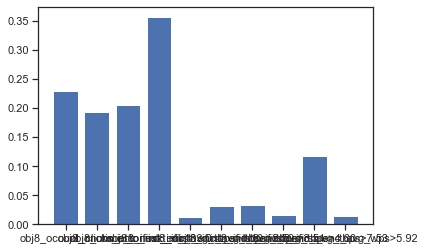

In [ ]:
scores = -np.log10(kbest.pvalues_)
scores /= scores.max()
score_series = pd.DataFrame({c:[s] for c,s in zip(list(polyX.columns), scores)})
plt.bar(list(polyX.columns)[:10],scores[:10])

In [ ]:

list(zip(*sorted(list(zip(list(polyX.columns), scores)),key=lambda x: x[1])[-10:]))

[('int8_ifirst_enc_var_tbps>0.00',
  'obj8_onext_int_103.0 int8_ifirst_enc_var_tbps>0.00',
  'obj8_otime_to_next_obj int8_ifirst_enc_duration>1.92',
  'obj8_ocount_clicks int8_ifirst_enc_var_tbps>0.00',
  'int8_ifirst_enc_duration>1.92 int8_ifirst_enc_var_wps>76.37',
  'int8_ifirst_enc_duration>1.92 int8_ifirst_enc_var_tbps>0.00',
  'obj8_onum_enc int8_ifirst_enc_duration>1.92',
  'obj8_ocount_clicks int8_ifirst_enc_duration>1.92',
  'obj8_onext_int_103.0 int8_ifirst_enc_duration>1.92',
  'int8_ifirst_enc_duration>1.92'),
 (0.4098427601883734,
  0.42425473668594466,
  0.4360052043668909,
  0.4908245690015252,
  0.49182243943839077,
  0.5977617748385018,
  0.7108925359195891,
  0.9096919187506552,
  0.9339262411754776,
  1.0)]

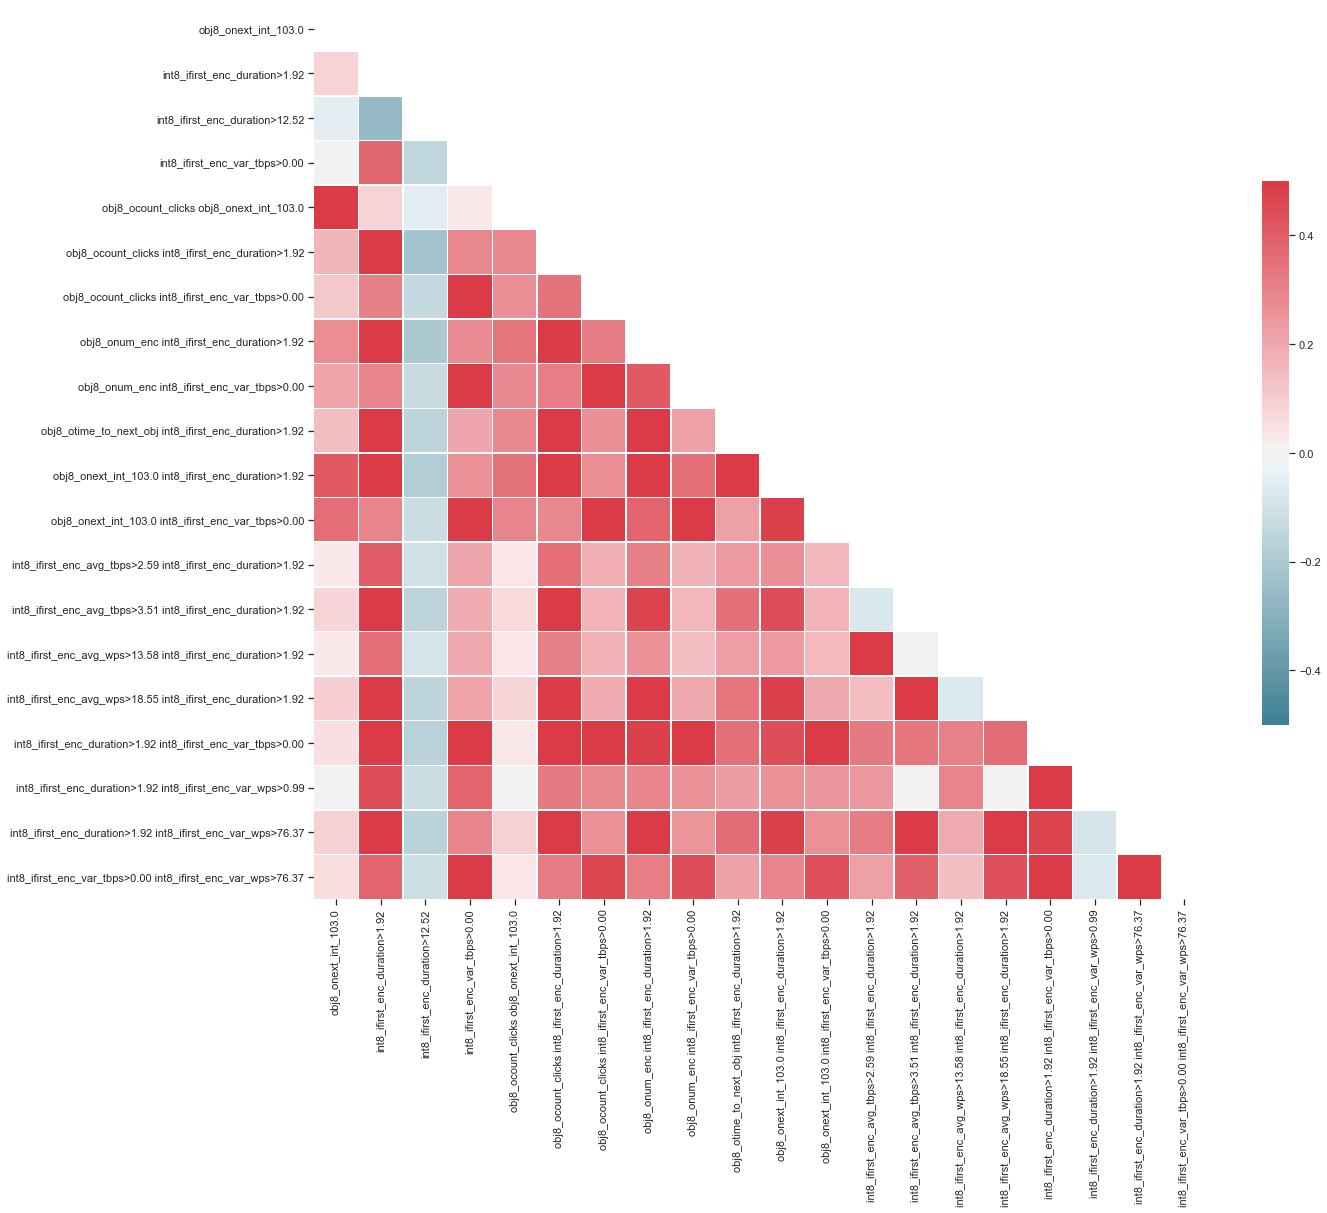

In [ ]:
corr_heatmap(polyX_best.iloc[:3000,:], max_corr=.5)

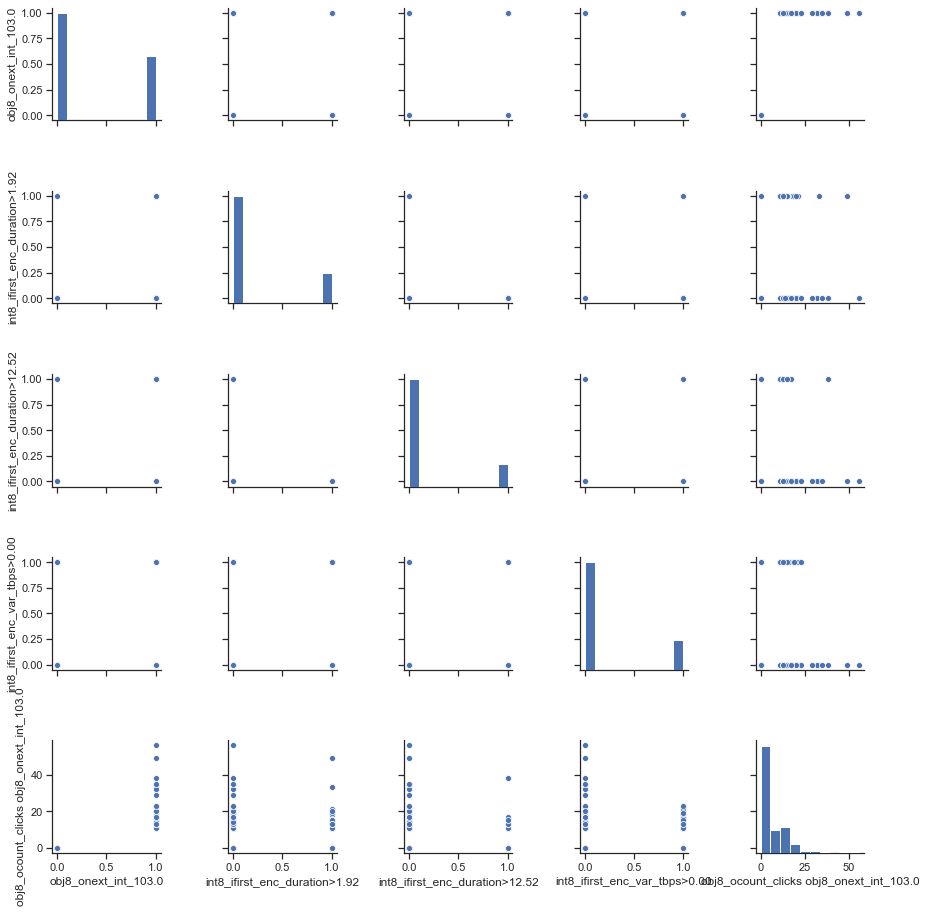

In [ ]:
sns.pairplot(polyX_best.iloc[:300,:5])

In [ ]:
pd.options.display.max_rows = 100
from sklearn.preprocessing import scale
integer_cols = [c for c in intX.columns if 'onext_int_' not in c]
intX['reading_skill'] = intY['R1_quiz_response'].map({0: 'not very good', 1: 'ok', 2: 'very good'})
intX.groupby('reading_skill').describe().unstack(1).unstack(1)

count          mean            std  \
                         reading_skill                                         
int8_ifirst_enc_avg_tbps not very good   1633.0      7.191876      17.232464   
                         ok              5332.0      7.343973      16.803406   
                         very good      17718.0      8.325736      18.645019   
int8_ifirst_enc_avg_wps  not very good   1633.0     36.780256      94.311857   
                         ok              5332.0     39.862741     104.699456   
                         very good      17718.0     44.330343     105.879568   
int8_ifirst_enc_duration not very good   1633.0     13.541626      10.783089   
                         ok              5332.0     16.365724      10.283204   
                         very good      17718.0     15.410902       8.206726   
int8_ifirst_enc_var_tbps not very good   1633.0   2094.860629   13985.374820   
                         ok              5332.0   1829.740329   13090.097004   
                         very good      17718.0   2351.593039   14785.144872   
int8_ifirst_enc_var_wps  not very good   1633.0  62875.772298  563511.468491   
                         ok              5332.0  70325.494318  617964.400234   
                         very good      17718.0  76531.850891  590479.348954   
obj8_ocount_clicks       not very good   1633.0     14.022045      10.225617   
                         ok              5332.0     13.509377       8.913458   
                         very good      17718.0     12.238515       7.570951   
obj8_onum_enc            not very good   1633.0      2.127985       1.565218   
                         ok              5332.0      2.029070       1.559938   
                         very good      17718.0      1.810249       1.530633   
obj8_otime_to_next_obj   not very good   1633.0     26.344505      27.208206   
                         ok              5332.0     29.231665      25.360444   
                         very good      17718.0     25.152258      20.804226   
obj8_onext_int_9.0       not very good   1633.0      0.464789       0.498911   
                         ok              5332.0      0.487622       0.499894   
                         very good      17718.0      0.589626       0.491915   
obj8_onext_int_103.0     not very good   1633.0      0.535211       0.498911   
                         ok              5332.0      0.512378       0.499894   
                         very good      17718.0      0.410374       0.491915   

                                             min         25%         50%  \
                         reading_skill                                     
int8_ifirst_enc_avg_tbps not very good  1.215677    2.729643    3.686683   
                         ok             1.196001    2.781895    3.869260   
                         very good      1.099946    2.847171    4.091748   
int8_ifirst_enc_avg_wps  not very good  6.358277   14.469928   19.889667   
                         ok             6.393980   14.482339   20.722960   
                         very good      5.920355   15.024778   21.780608   
int8_ifirst_enc_duration not very good  1.981000    5.655000   10.322000   
                         ok             1.998000    8.403750   15.034000   
                         very good      1.917000   10.084250   14.319500   
int8_ifirst_enc_var_tbps not very good  0.009111    0.990470    2.788717   
                         ok             0.003781    1.531264    7.211684   
                         very good      0.000988    2.154569   11.426195   
int8_ifirst_enc_var_wps  not very good  3.958979   71.283661  153.043590   
                         ok             2.450649   87.081558  217.593194   
                         very good      0.986027  104.696942  325.062974   
obj8_ocount_clicks       not very good  9.000000    9.000000   11.000000   
                         ok             9.000000    9.000000   11.000000   
                         very good   

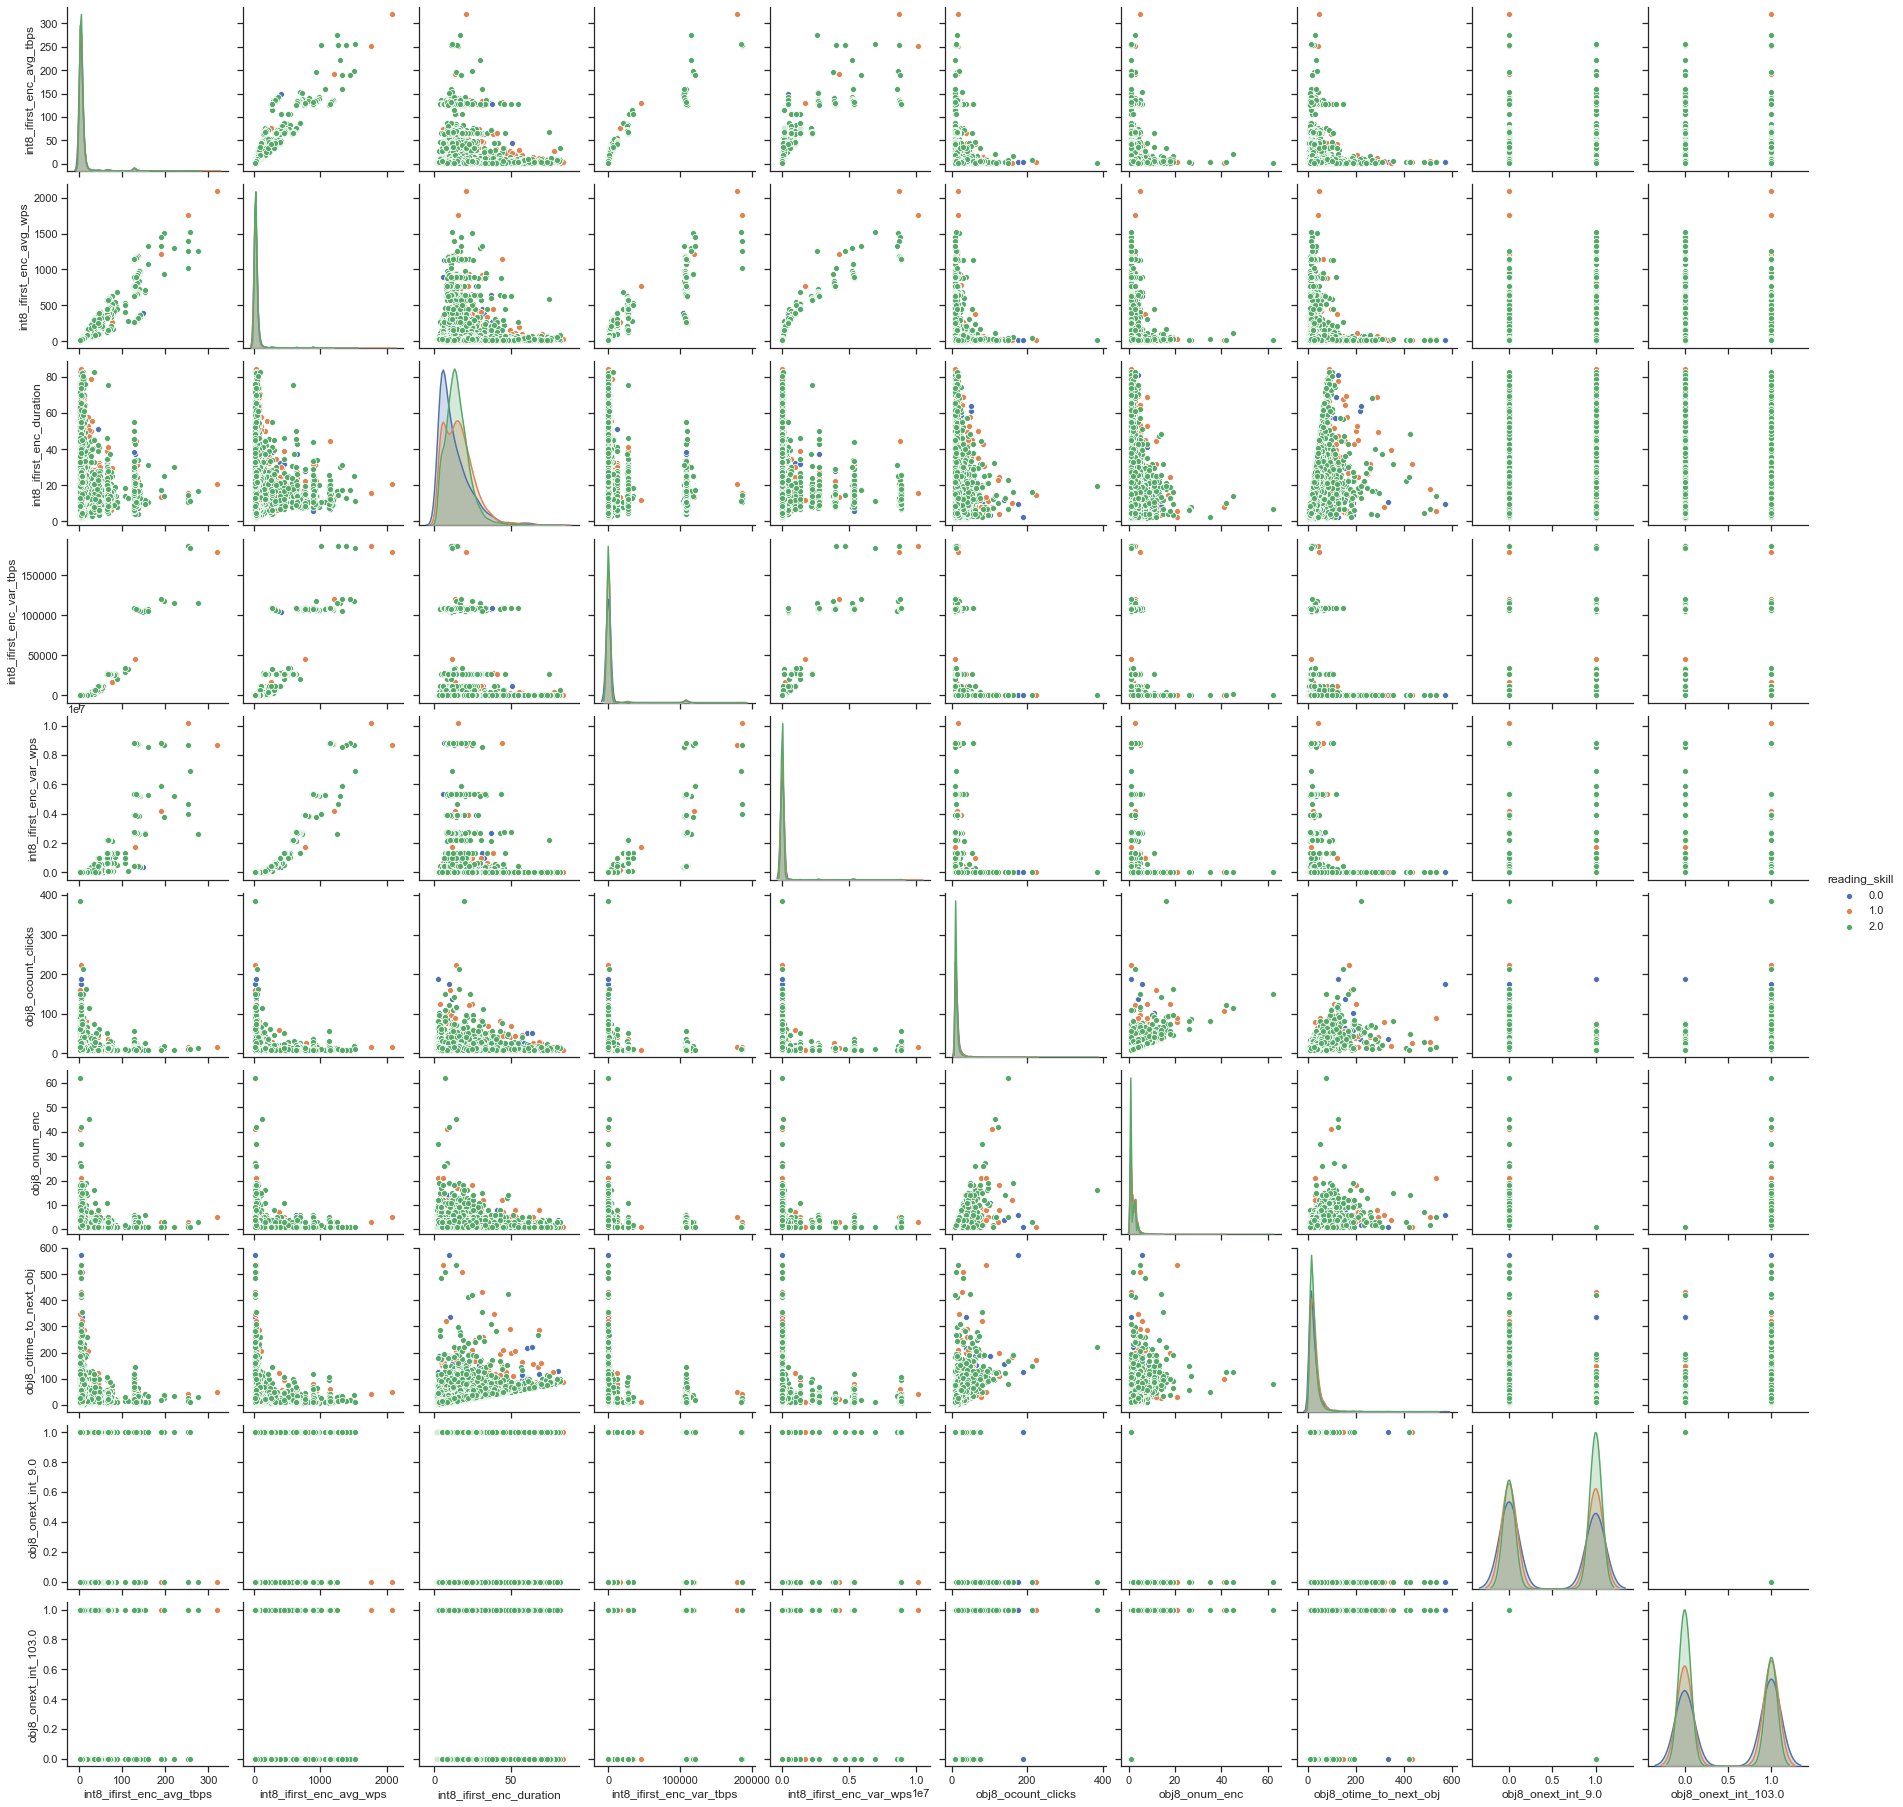

In [ ]:
sns.pairplot(intX, hue='reading_skill')

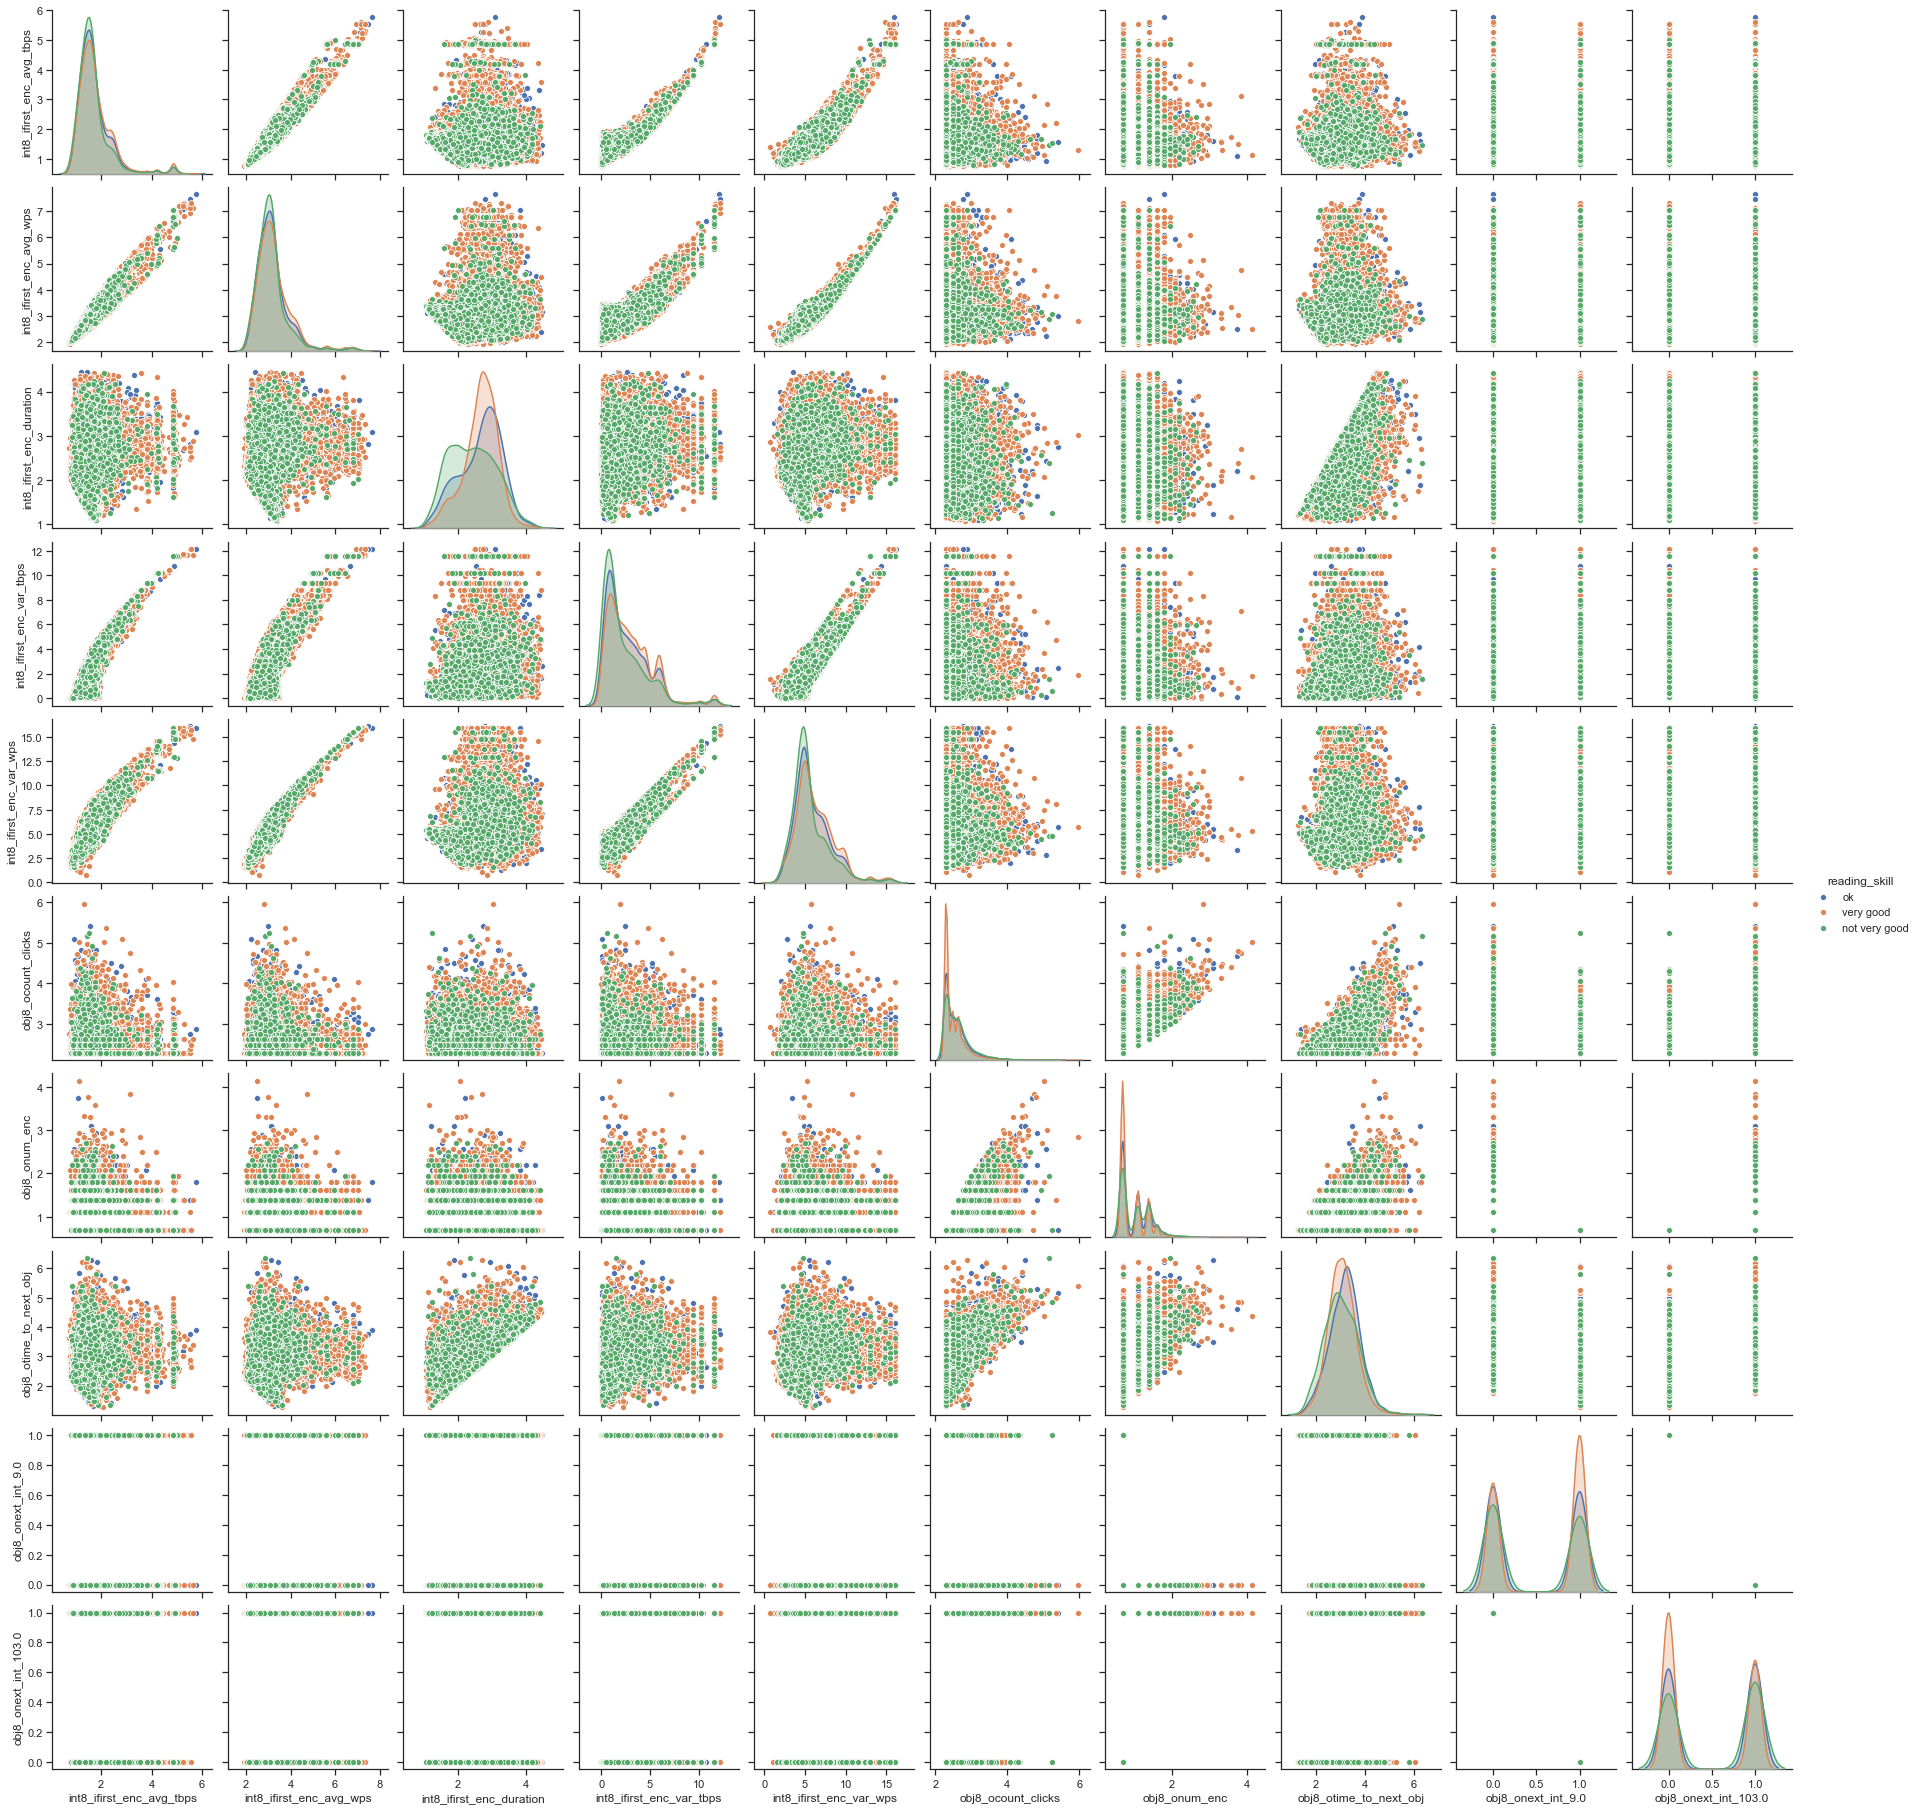

In [ ]:
logIntX = intX.copy()
logIntX[integer_cols] = logIntX[integer_cols].applymap(np.log1p)
sns.pairplot(logIntX, hue='reading_skill')

In [ ]:
integer_cols

['int8_ifirst_enc_avg_tbps',
 'int8_ifirst_enc_avg_wps',
 'int8_ifirst_enc_duration',
 'int8_ifirst_enc_var_tbps',
 'int8_ifirst_enc_var_wps',
 'obj8_ocount_clicks',
 'obj8_onum_enc',
 'obj8_otime_to_next_obj',
 'reading_skill']

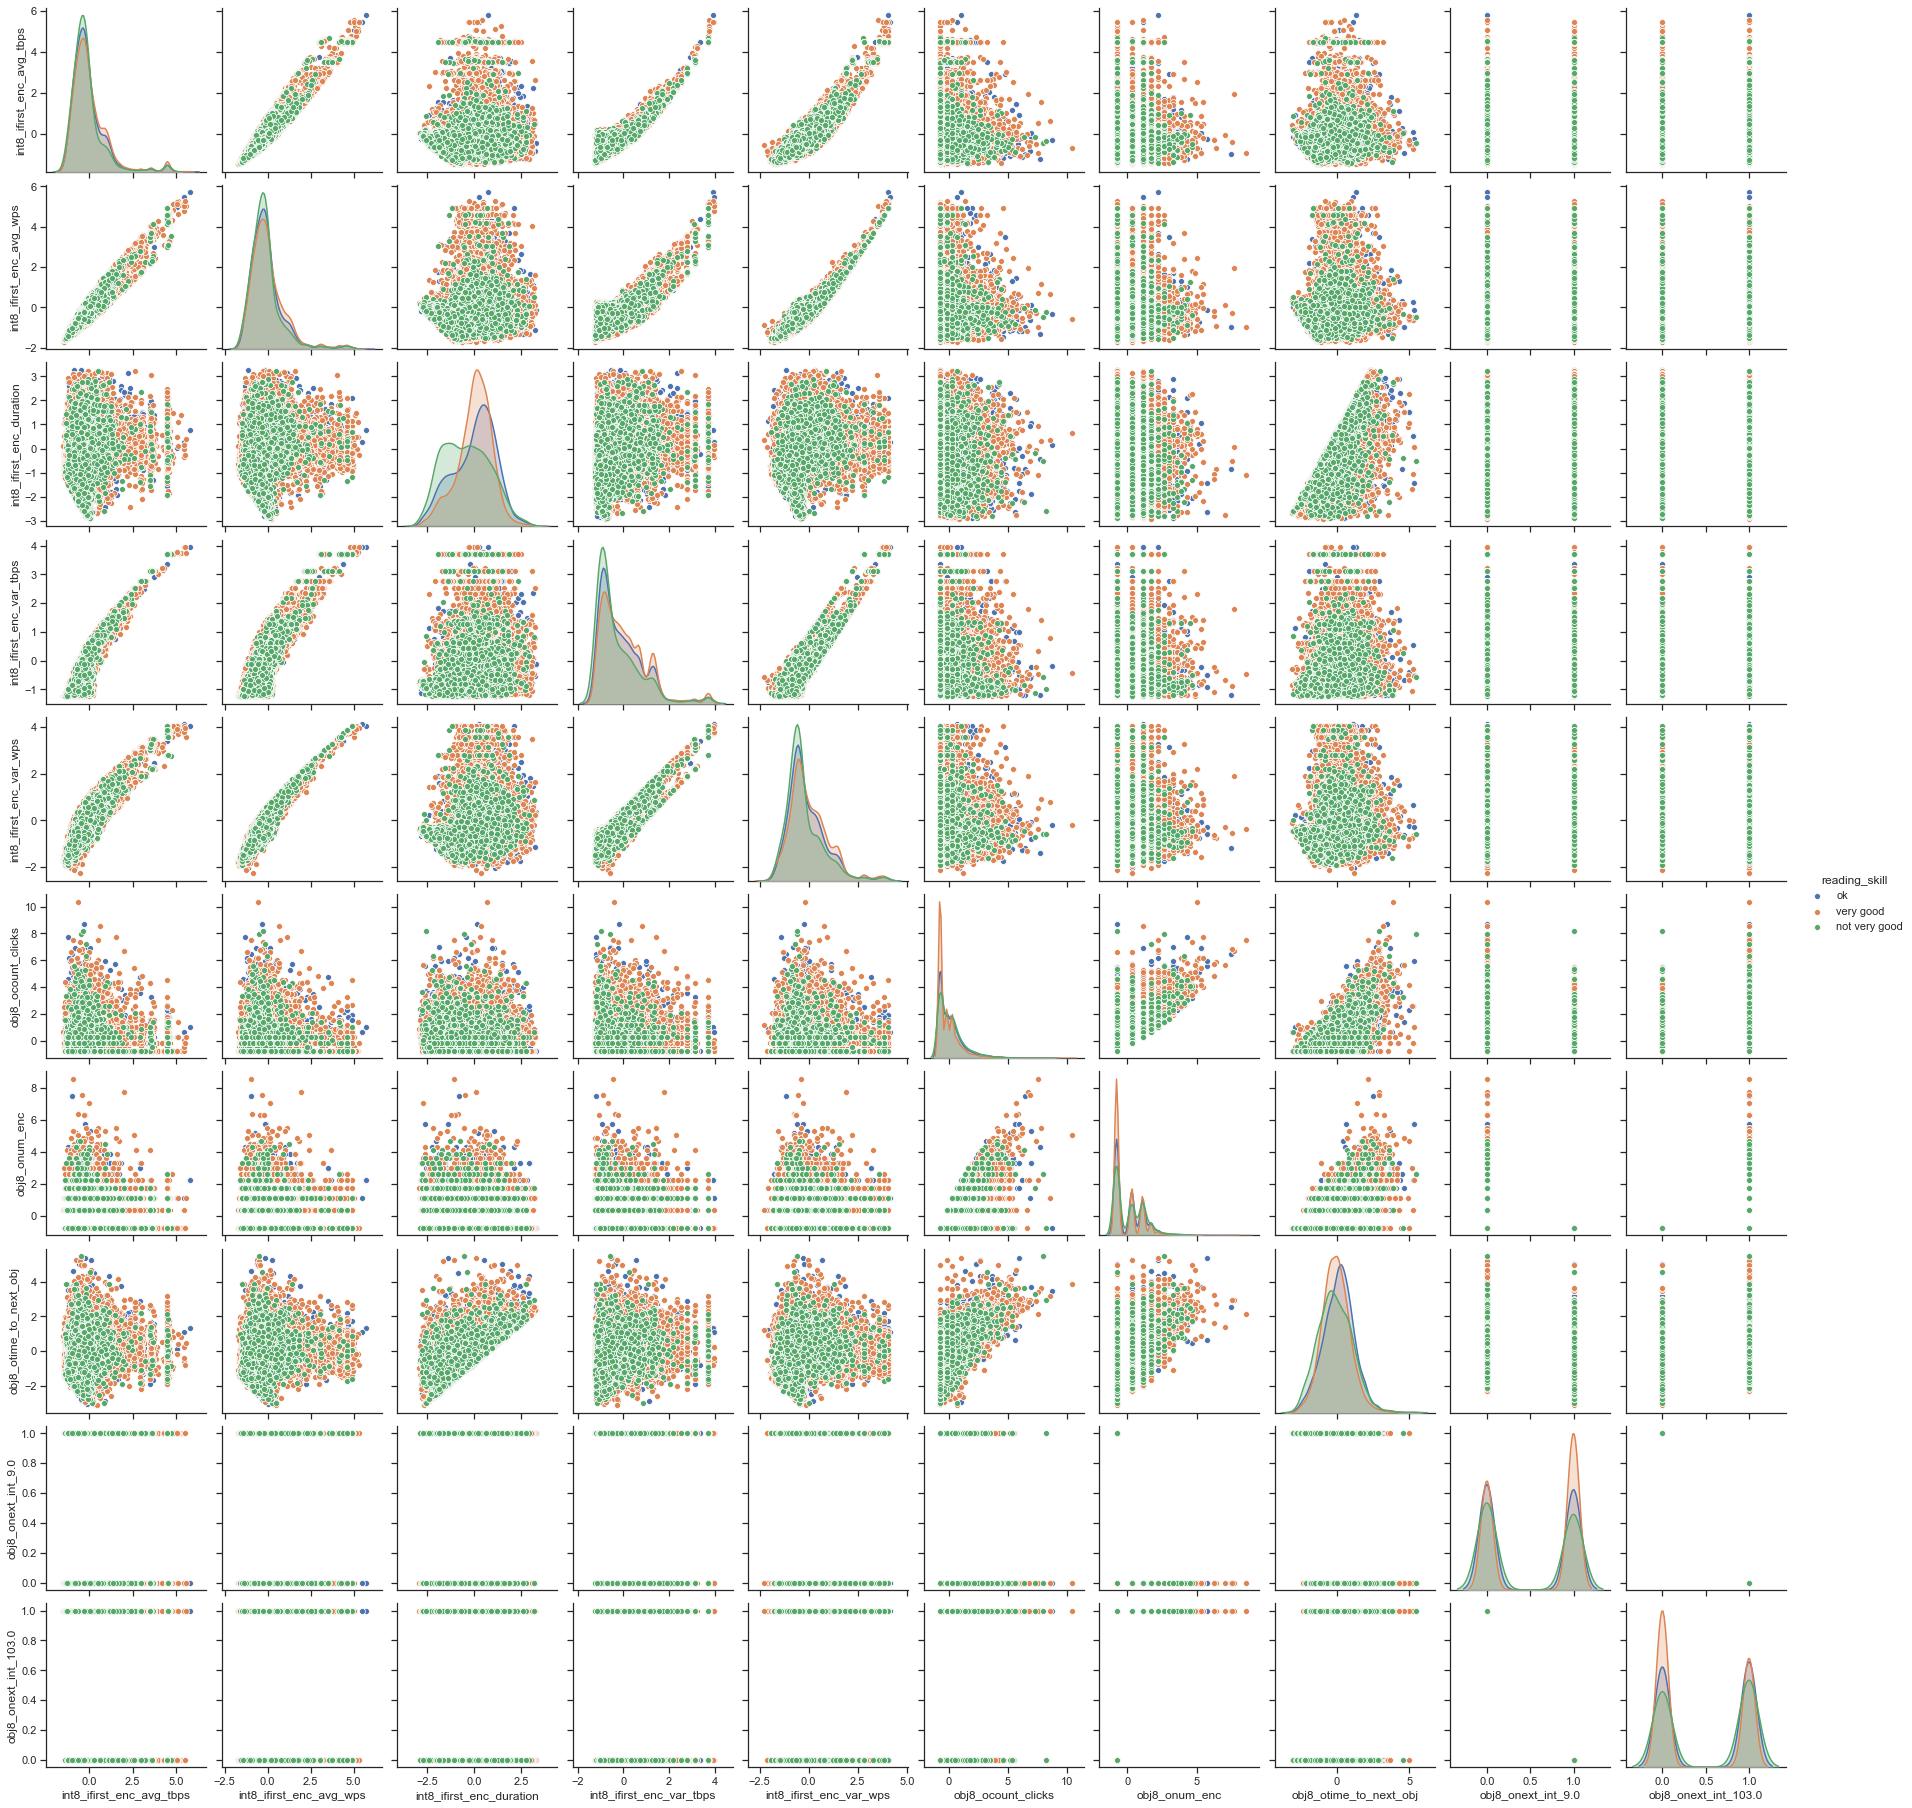

In [ ]:
scaleLogIntX = logIntX.copy()
scaleLogIntX[nonbool_cols] = scale(scaleLogIntX[nonbool_cols], axis=0)
sns.pairplot(scaleLogIntX, hue='reading_skill')

In [ ]:
scaleLogIntX.mean()

int8_ifirst_enc_avg_tbps   -1.384641e-16
int8_ifirst_enc_avg_wps     6.795826e-16
int8_ifirst_enc_duration    3.465562e-16
int8_ifirst_enc_var_tbps    8.995852e-17
int8_ifirst_enc_var_wps    -3.233469e-16
obj8_ocount_clicks          4.215096e-16
obj8_onum_enc              -1.211921e-16
obj8_otime_to_next_obj     -1.183854e-16
obj8_onext_int_9.0          5.593323e-01
obj8_onext_int_103.0        4.406677e-01
dtype: float64

In [ ]:
scaleLogIntX.corr()

int8_ifirst_enc_avg_tbps  int8_ifirst_enc_avg_wps  \
int8_ifirst_enc_avg_tbps                  1.000000                 0.964831   
int8_ifirst_enc_avg_wps                   0.964831                 1.000000   
int8_ifirst_enc_duration                  0.078950                 0.068117   
int8_ifirst_enc_var_tbps                  0.940319                 0.904727   
int8_ifirst_enc_var_wps                   0.907084                 0.955969   
obj8_ocount_clicks                       -0.038081                -0.037215   
obj8_onum_enc                            -0.030306                -0.029828   
obj8_otime_to_next_obj                    0.021504                 0.014428   
obj8_onext_int_9.0                        0.028866                 0.028608   
obj8_onext_int_103.0                     -0.028866                -0.028608   

                          int8_ifirst_enc_duration  int8_ifirst_enc_var_tbps  \
int8_ifirst_enc_avg_tbps                  0.078950                  0.940319   
int8_ifirst_enc_avg_wps                   0.068117                  0.904727   
int8_ifirst_enc_duration                  1.000000                  0.232256   
int8_ifirst_enc_var_tbps                  0.232256                  1.000000   
int8_ifirst_enc_var_wps                   0.182843                  0.931165   
obj8_ocount_clicks                       -0.050600                 -0.077282   
obj8_onum_enc                            -0.027863                 -0.057625   
obj8_otime_to_next_obj                    0.681312                  0.096027   
obj8_onext_int_9.0                        0.010614                  0.056047   
obj8_onext_int_103.0                     -0.010614                 -0.056047   

                          int8_ifirst_enc_var_wps  obj8_ocount_clicks  \
int8_ifirst_enc_avg_tbps                 0.907084           -0.038081   
int8_ifirst_enc_avg_wps                  0.955969           -0.037215   
int8_ifirst_enc_duration                 0.182843           -0.050600   
int8_ifirst_enc_var_tbps                 0.931165           -0.077282   
int8_ifirst_enc_var_wps                  1.000000           -0.063345   
obj8_ocount_clicks                      -0.063345            1.000000   
obj8_onum_enc                           -0.047140            0.751527   
obj8_otime_to_next_obj                   0.074255            0.597470   
obj8_onext_int_9.0                       0.045718           -0.596956   
obj8_onext_int_103.0                    -0.045718            0.596956   

                          obj8_onum_enc  obj8_otime_to_next_obj  \
int8_ifirst_enc_avg_tbps      -0.030306                0.021504   
int8_ifirst_enc_avg_wps       -0.029828                0.014428   
int8_ifirst_enc_duration      -0.027863                0.681312   
int8_ifirst_enc_var_tbps      -0.057625                0.096027   
int8_ifirst_enc_var_wps       -0.047140                0.074255   
obj8_ocount_clicks             0.751527                0.597470   
obj8_onum_enc                  1.000000                0.511813   
obj8_otime_to_next_obj         0.511813                1.000000   
obj8_onext_int_9.0            -0.860890               -0.445384   
obj8_onext_int_103.0           0.860890                0.445384   

                          obj8_onext_int_9.0  obj8_onext_int_103.0  
int8_ifirst_enc_avg_tbps            0.028866             -0.028866  
int8_ifirst_enc_avg_wps             0.028608             -0.028608  
int8_ifirst_enc_duration            0.010614             -0.010614  
int8_ifirst_enc_var_tbps            0.056047             -0.056047  
int8_ifirst_enc_var_wps             0.045718             -0.045718  
obj8_ocount_clicks                 -0.596956              0.596956  
obj8_onum_enc                      -0.860890              0.860890  
obj8_otime_to_next_obj             -0.445384              0.445384  
obj8_onext_int_9.0                  1.000000             -1.000000  
obj8_onext_int_103.0               -1.00000

In [ ]:
intX.corr()

int8_ifirst_enc_avg_tbps  int8_ifirst_enc_avg_wps  \
int8_ifirst_enc_avg_tbps                  1.000000                 0.916458   
int8_ifirst_enc_avg_wps                   0.916458                 1.000000   
int8_ifirst_enc_duration                  0.020189                 0.019314   
int8_ifirst_enc_var_tbps                  0.958130                 0.876848   
int8_ifirst_enc_var_wps                   0.779181                 0.933757   
obj8_ocount_clicks                       -0.024163                -0.022070   
obj8_onum_enc                            -0.019536                -0.019202   
obj8_otime_to_next_obj                   -0.010073                -0.009654   
obj8_onext_int_9.0                        0.018252                 0.019405   
obj8_onext_int_103.0                     -0.018252                -0.019405   

                          int8_ifirst_enc_duration  int8_ifirst_enc_var_tbps  \
int8_ifirst_enc_avg_tbps                  0.020189                  0.958130   
int8_ifirst_enc_avg_wps                   0.019314                  0.876848   
int8_ifirst_enc_duration                  1.000000                  0.008099   
int8_ifirst_enc_var_tbps                  0.008099                  1.000000   
int8_ifirst_enc_var_wps                   0.008775                  0.810157   
obj8_ocount_clicks                        0.000152                 -0.020059   
obj8_onum_enc                            -0.004756                 -0.016545   
obj8_otime_to_next_obj                    0.508614                 -0.011760   
obj8_onext_int_9.0                       -0.024438                  0.012494   
obj8_onext_int_103.0                      0.024438                 -0.012494   

                          int8_ifirst_enc_var_wps  obj8_ocount_clicks  \
int8_ifirst_enc_avg_tbps                 0.779181           -0.024163   
int8_ifirst_enc_avg_wps                  0.933757           -0.022070   
int8_ifirst_enc_duration                 0.008775            0.000152   
int8_ifirst_enc_var_tbps                 0.810157           -0.020059   
int8_ifirst_enc_var_wps                  1.000000           -0.014280   
obj8_ocount_clicks                      -0.014280            1.000000   
obj8_onum_enc                           -0.015410            0.651874   
obj8_otime_to_next_obj                  -0.007873            0.585247   
obj8_onext_int_9.0                       0.013638           -0.382279   
obj8_onext_int_103.0                    -0.013638            0.382279   

                          obj8_onum_enc  obj8_otime_to_next_obj  \
int8_ifirst_enc_avg_tbps      -0.019536               -0.010073   
int8_ifirst_enc_avg_wps       -0.019202               -0.009654   
int8_ifirst_enc_duration      -0.004756                0.508614   
int8_ifirst_enc_var_tbps      -0.016545               -0.011760   
int8_ifirst_enc_var_wps       -0.015410               -0.007873   
obj8_ocount_clicks             0.651874                0.585247   
obj8_onum_enc                  1.000000                0.464501   
obj8_otime_to_next_obj         0.464501                1.000000   
obj8_onext_int_9.0            -0.641373               -0.344279   
obj8_onext_int_103.0           0.641373                0.344279   

                          obj8_onext_int_9.0  obj8_onext_int_103.0  
int8_ifirst_enc_avg_tbps            0.018252             -0.018252  
int8_ifirst_enc_avg_wps             0.019405             -0.019405  
int8_ifirst_enc_duration           -0.024438              0.024438  
int8_ifirst_enc_var_tbps            0.012494             -0.012494  
int8_ifirst_enc_var_wps             0.013638             -0.013638  
obj8_ocount_clicks                 -0.382279              0.382279  
obj8_onum_enc                      -0.641373              0.641373  
obj8_otime_to_next_obj             -0.344279              0.344279  
obj8_onext_int_9.0                  1.000000             -1.000000  
obj8_onext_int_103.0               -1.00000

In [ ]:
df[["int8_itotal_duration","obj8_otime_to_next_obj"]].describe()

int8_itotal_duration  obj8_otime_to_next_obj
count          25978.000000            25978.000000
mean              23.210244               48.441649
std              558.852490             1088.949252
min               -0.286000               -0.454000
25%                9.567250               14.127000
50%               14.286000               21.139500
75%               19.763750               31.619750
max            80543.670000            86344.867000

In [ ]:
def 

In [ ]:
df[[c for c in df_cols if 'omeaningful_action_count' in c]].describe()

obj0_omeaningful_action_count  obj10_omeaningful_action_count  \
count                        45858.0                         24919.0   
mean                             0.0                             0.0   
std                              0.0                             0.0   
min                              0.0                             0.0   
25%                              0.0                             0.0   
50%                              0.0                             0.0   
75%                              0.0                             0.0   
max                              0.0                             0.0   

       obj11_omeaningful_action_count  obj12_omeaningful_action_count  \
count                    24362.000000                    23533.000000   
mean                         7.351736                        2.577699   
std                          6.556506                        1.420378   
min                          1.000000                        1.000000   
25%                          3.000000                        2.000000   
50%                          5.000000                        2.000000   
75%                          9.000000                        3.000000   
max                        130.000000                       40.000000   

       obj13_omeaningful_action_count  obj14_omeaningful_action_count  \
count                    23294.000000                    23110.000000   
mean                         1.474586                        2.022241   
std                          1.278946                        1.610373   
min                          1.000000                        0.000000   
25%                          1.000000                        1.000000   
50%                          1.000000                        2.000000   
75%                          1.000000                        2.000000   
max                         36.000000                       47.000000   

       obj15_omeaningful_action_count  obj16_omeaningful_action_count  \
count                    22719.000000                    22183.000000   
mean                         8.348519                        2.320651   
std                          5.440846                        3.686259   
min                          1.000000                        1.000000   
25%                          5.000000                        1.000000   
50%                          7.000000                        1.000000   
75%                          9.000000                        3.000000   
max                         87.000000                      180.000000   

       obj17_omeaningful_action_count  obj18_omeaningful_action_count  ...  \
count                    22059.000000                    21655.000000  ...   
mean                         2.025160                        7.165597  ...   
std                          4.543196                        4.966128  ...   
min                          1.000000                        1.000000  ...   
25%                          1.000000                        4.000000  ...   
50%                          1.000000                        6.000000  ...   
75%                          1.000000                        8.000000  ...   
max                         92.000000                      127.000000  ...   

       obj73_omeaningful_action_count  obj74_omeaningful_action_count  \
count                          7734.0                          7712.0   
mean                              0.0                             0.0   
std                               0.0                             0.0   
min                               0.0                             0.0   
25%                               0.0                             0.0   
50%                               0.0                             0.0   
75%                               0.0                             0.0   
max                               0.0                             0.0   

       obj75_omeaningfu

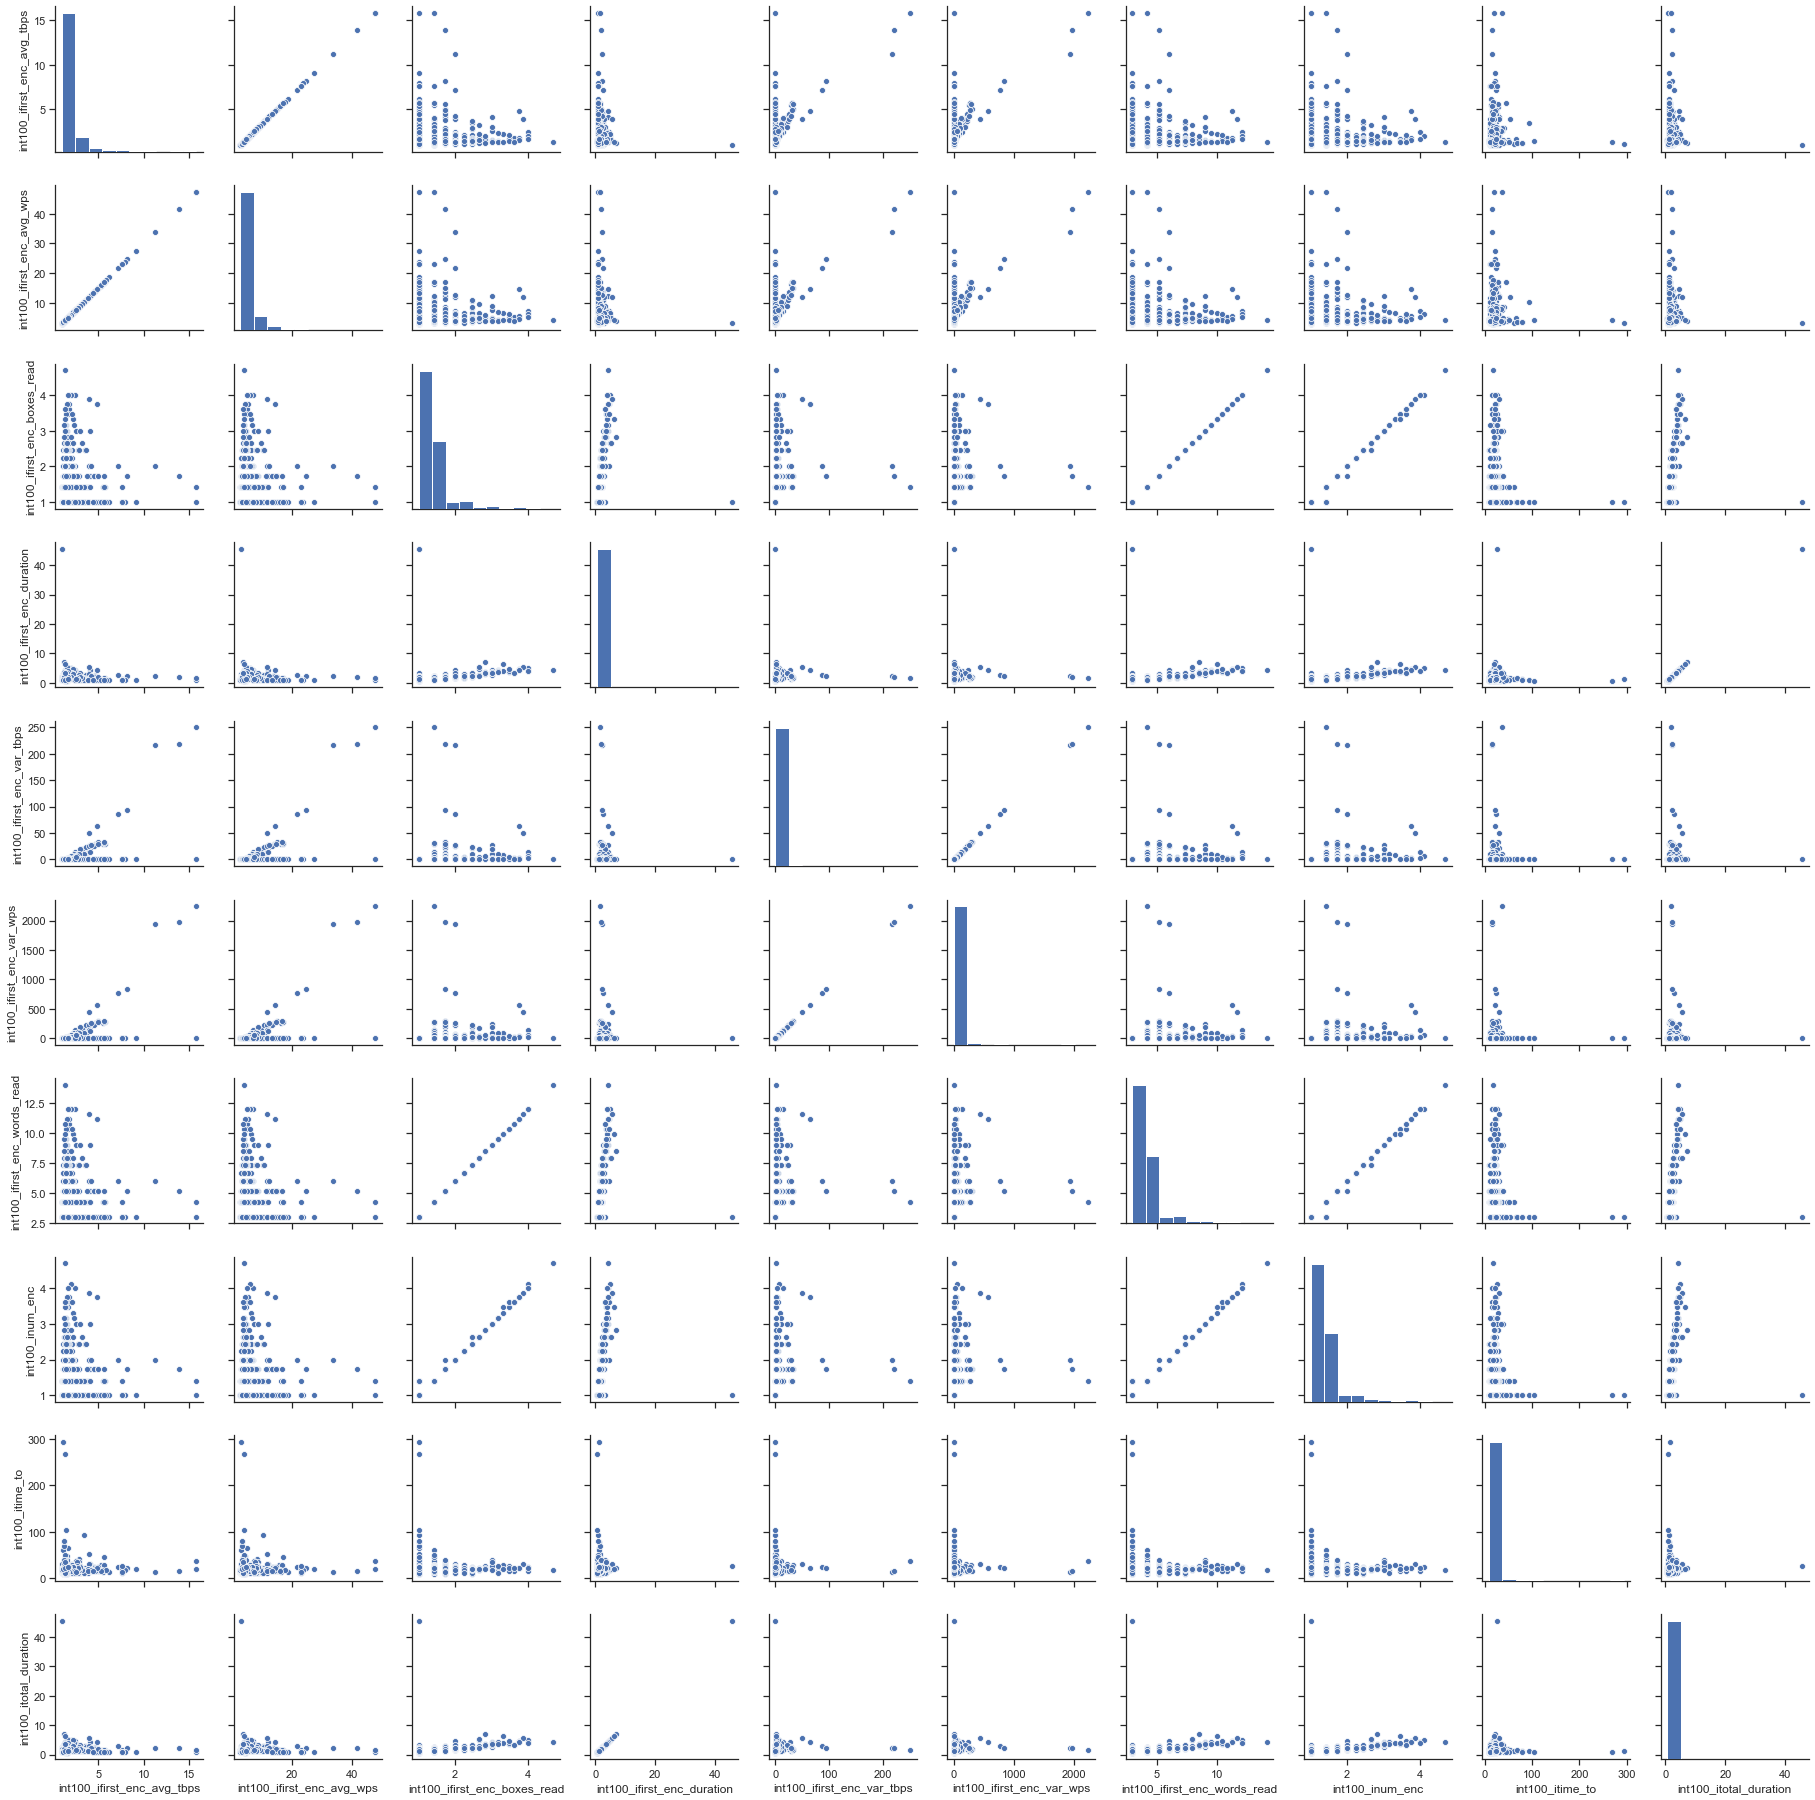

In [ ]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
interaction = 100
int_df = df[int_feats(interaction)]
gdf = int_df.apply(np.sqrt)
sns.pairplot(gdf)

In [ ]:
def get_X_y(features, y_feat='R1_quiz_response'):
    

#### Sampler - Classifier Search
Takes a long time to run (3hrs+)

In [ ]:
outfolder = r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Grids"
outfile = 'JM_gridsearch_629_1831.csv'
csv_path = r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006261015_obj12-_thresh1_1.csv"
outpath = os.path.join(outfolder,outfile)

In [ ]:
input_folder = r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data"
print('Files in input folder:', ''.join([
        f'\n{f}' for f in os.listdir(input_folder) if f.endswith('sv')]))

Files in input folder: 
full_proc_through_May.csv
JM_202006251335_obj12-_thresh10_10.csv
JM_202006191636_obj43-_thresh0_9344x3660.csv
JM_202006251335_obj43-_thresh10_10.csv
JM_202006251335_obj76-_thresh10_10.csv
JM_202006251335_with_A23_obj12-_thresh10_10.csv
JM_202006251335_with_A23_obj43-_thresh10_10.csv
JM_202006251335_with_A23_obj76-_thresh10_10.csv
JM_202006261015_obj43-_thresh1_1.csv
JM_202006261015_obj12-_thresh1_1.csv
JM_202006291758_obj12-_thresh1_1.csv
JM_202006291758_obj43-_thresh1_1.csv
JM_202006291758_obj76-_thresh1_1.csv
JM_202006291758_withUnreached_obj12-_thresh1_1.csv
JM_202006291758_withUnreached_obj43-_thresh1_1.csv
JM_202006291758_withUnreached_obj76-_thresh1_1.csv


In [ ]:
worker = MainClass(csv_fpath=csv_path)
if os.path.isfile(outpath):
    score_df = pd.read_csv(outpath,index_col=0)
else:
    score_df = pd.DataFrame()

datasets = [
    ("JM_202006291758_withUnreached_obj12-_thresh1_1.csv", "JM_202006291758_withUnreached_obj12-_thresh1_1", ['y1_bin_0v12', 'y1_bin_01v2', 'y1_bin_x']),
    ("JM_202006291758_withUnreached_obj43-_thresh1_1.csv", "JM_202006291758_withUnreached_obj43-_thresh1_1", ['y1_bin_0v12', 'y1_bin_01v2', 'y1_bin_x']),
    ("JM_202006291758_withUnreached_obj76-_thresh1_1.csv", "JM_202006291758_withUnreached_obj76-_thresh1_1", ['y1_bin_0v12', 'y1_bin_01v2', 'y1_bin_x']),
    ("JM_202006291758_obj12-_thresh1_1.csv", "JM_202006291758_obj12-_thresh1_1", ['y1_bin_0v12', 'y1_bin_01v2', 'y1_bin_x']),
    ("JM_202006291758_obj43-_thresh1_1.csv", "JM_202006291758_obj43-_thresh1_1", ['y1_bin_0v12', 'y1_bin_01v2', 'y1_bin_x']),
    ("JM_202006291758_obj76-_thresh1_1.csv", "JM_202006291758_obj76-_thresh1_1", ['y1_bin_0v12', 'y1_bin_01v2', 'y1_bin_x']),
    ("JM_202006261015_obj12-_thresh1_1.csv", "JM_202006261015_obj12-_thresh1_1", ['y1_bin','y1_bin_x']),


    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_obj43-_thresh10_10.csv", 
    # "obj43-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_obj76-_thresh10_10.csv", 
    # "obj76-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_with_A23_obj12-_thresh10_10.csv", 
    # "with_A23_obj12-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_with_A23_obj43-_thresh10_10.csv", 
    # "with_A23_obj43-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_with_A23_obj76-_thresh10_10.csv", 
    # "with_A23_obj76-"),
]

y_keys = [
          'y1_bin','y1_bin_x'
]
classifiers = [
    # (CategoricalNB(), 'Naive Bayes'),
    (LogisticRegression(n_jobs=-1, solver='saga', penalty='l2'), 'LogisitcRegressionL2'),
    (LogisticRegression(n_jobs=-1, solver='saga', penalty='l1'), 'LogisitcRegressionL1'),
    (XGBClassifier(), 'XGBClassifier'),
    (MLPClassifier(hidden_layer_sizes=(50)), 'MLP-50'),
    (MLPClassifier(hidden_layer_sizes=(50), early_stopping=True), 'MLP-50_early'),
    (DecisionTreeClassifier(), 'DTree'),
    (ExtraTreeClassifier(), 'ExtraDTree'),
    (LogisticRegressionCV(n_jobs=-1,scoring='roc_auc',penalty='l1',solver='saga'), 'LogisticRegressionCV_auc_l1'),
    (LogisticRegressionCV(n_jobs=-1,scoring='roc_auc',penalty='l2',solver='saga'), 'LogisticRegressionCV_auc_l2'),
    (LogisticRegressionCV(n_jobs=-1,scoring='f1',penalty='l1',solver='saga'), 'LogisticRegressionCV_f1_l1'),
    (LogisticRegressionCV(n_jobs=-1,scoring='f1',penalty='l2',solver='saga'), 'LogisticRegressionCV_f1_l2'),


]
samplers = [
    (None, 'None'),
    (RandomOverSampler(random_state=1), 'RandomOverSampler'),
    (RandomUnderSampler(random_state=1), 'RandomUnderSampler'),
    (EditedNearestNeighbours(n_jobs=-1), 'ENN'),
    (RepeatedEditedNearestNeighbours(n_jobs=-1), 'RepeatedENN'),
    (SMOTEENN(n_jobs=-1), 'SMOTEENN'),
    (SMOTETomek(n_jobs=-1), 'SMOTETomek')
]

for dataset_fname, dname, y_keys in datasets:
    dataset_path = os.path.join(input_folder, dataset_fname)
    worker = MainClass(csv_fpath=dataset_path)
    for y_key in y_keys:
        worker.set_y(y_key)
        for classifier, cname in classifiers:
            for sampler, sname in samplers:
                print(f'{dname}_{cname}_{sname}_{y_key}...  ',end='')
                try:
                    clf = worker.run_fit(classifier=classifier, sampler=sampler, verbose=False)
                    metric_list = worker.metrics()
                    print(f'metrics: {metric_list}')
                except ValueError as e:
                    print('Failed. Value Error:',e)
                    metric_list = []
                except AttributeError as e:
                    print('Failed. Attribute Error:', e)
                    metric_list = []
                for metric, mname in metric_list:
                    score_df.loc[f'{dname}_{cname}_{sname}_{y_key}', 'dataset'] = dname
                    score_df.loc[f'{dname}_{cname}_{sname}_{y_key}', 'classifier'] = cname
                    score_df.loc[f'{dname}_{cname}_{sname}_{y_key}', 'sampler'] = sname
                    score_df.loc[f'{dname}_{cname}_{sname}_{y_key}', 'label'] = y_key
                    score_df.loc[f'{dname}_{cname}_{sname}_{y_key}', mname] = metric
                try:
                    score_df.to_csv(outpath)
                except PermissionError:
                    print('Could not save. Permission Error.')

JM_202006291758_withUnreached_obj12-_thresh1_1_LogisitcRegressionL2_None_y1_bin_0v12...  

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6943677372946407, 'test_AUC'), (0.49476347687784666, 'test_f1_avg'), (0.934283452098179, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (3537, 'test_tp'), (230, 'test_fp'), (3, 'test_tn'), (19, 'test_fn'), (0.9389434563312982, 'test_prec_1'), (0.13636363636363635, 'test_prec_0'), (0.9946569178852643, 'test_recall_1'), (0.012875536480686695, 'test_recall_0'), (0.9659975419909874, 'test_f1_1'), (0.023529411764705882, 'test_f1_0'), (0.797447614353114, 'train_AUC'), (0.526015714586203, 'train_f1_avg'), (0.9391539629116347, 'train_acc'), (15153, 'train_total_size'), (3160, 'train_num_feats'), (952, 'train_size_0s'), (14201, 'train_size_1s'), (0.9371741569326206, 'train_baseline'), (14189, 'train_tp'), (910, 'train_fp'), (42, 'train_tn'), (12, 'train_fn'), (0.9397311080203987, 'train_prec_1'), (0.7777777777777778, 'train_prec_0'), (0.9991549890852757, 'train_recall_1'), (0.04

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6756470355368669, 'test_AUC'), (0.5158520586935921, 'test_f1_avg'), (0.7300079176563737, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (2643, 'test_tp'), (110, 'test_fp'), (123, 'test_tn'), (913, 'test_fn'), (0.9600435888122049, 'test_prec_1'), (0.11872586872586872, 'test_prec_0'), (0.7432508436445444, 'test_recall_1'), (0.5278969957081545, 'test_recall_0'), (0.837850689491203, 'test_f1_1'), (0.19385342789598106, 'test_f1_0'), (0.7105025293476691, 'train_AUC'), (0.33927892205532817, 'train_f1_avg'), (0.5024646151679459, 'train_acc'), (28402, 'train_total_size'), (3160, 'train_num_feats'), (14201, 'train_size_0s'), (14201, 'train_size_1s'), (0.5, 'train_baseline'), (14193, 'train_tp'), (14123, 'train_fp'), (78, 'train_tn'), (8, 'train_fn'), (0.501236050289589, 'train_prec_1'), (0.9069767441860465, 'train_prec_0'), (0.9994366593901838, 'train_recall_1'), (0.0054925709457

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6584108585139303, 'test_AUC'), (0.4722375822864844, 'test_f1_avg'), (0.6402744787542888, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (2282, 'test_tp'), (89, 'test_fp'), (144, 'test_tn'), (1274, 'test_fn'), (0.9624630957401941, 'test_prec_1'), (0.10155148095909731, 'test_prec_0'), (0.6417322834645669, 'test_recall_1'), (0.6180257510729614, 'test_recall_0'), (0.7700354310781171, 'test_f1_1'), (0.17443973349485162, 'test_f1_0'), (0.7424285890826918, 'train_AUC'), (0.3469410368890776, 'train_f1_avg'), (0.5057773109243697, 'train_acc'), (1904, 'train_total_size'), (3160, 'train_num_feats'), (952, 'train_size_0s'), (952, 'train_size_1s'), (0.5, 'train_baseline'), (951, 'train_tp'), (940, 'train_fp'), (12, 'train_tn'), (1, 'train_fn'), (0.5029085140137494, 'train_prec_1'), (0.9230769230769231, 'train_prec_0'), (0.9989495798319328, 'train_recall_1'), (0.012605042016806723, '

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6985183718987916, 'test_AUC'), (0.4960182992587436, 'test_f1_avg'), (0.9290050145157034, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (3516, 'test_tp'), (229, 'test_fp'), (4, 'test_tn'), (40, 'test_fn'), (0.9388518024032043, 'test_prec_1'), (0.09090909090909091, 'test_prec_0'), (0.9887514060742407, 'test_recall_1'), (0.017167381974248927, 'test_recall_0'), (0.9631557320914944, 'test_f1_1'), (0.02888086642599278, 'test_f1_0'), (0.740890111022902, 'train_AUC'), (0.4880820267436712, 'train_f1_avg'), (0.9298830149563158, 'train_acc'), (13506, 'train_total_size'), (3160, 'train_num_feats'), (952, 'train_size_0s'), (12554, 'train_size_1s'), (0.9295128091218717, 'train_baseline'), (12553, 'train_tp'), (946, 'train_fp'), (6, 'train_tn'), (1, 'train_fn'), (0.9299207348692495, 'train_prec_1'), (0.8571428571428571, 'train_prec_0'), (0.99992034411343, 'train_recall_1'), (0.006302

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6908712591183613, 'test_AUC'), (0.4977711054038709, 'test_f1_avg'), (0.9255740300870943, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (3502, 'test_tp'), (228, 'test_fp'), (5, 'test_tn'), (54, 'test_fn'), (0.9388739946380698, 'test_prec_1'), (0.0847457627118644, 'test_prec_0'), (0.984814398200225, 'test_recall_1'), (0.02145922746781116, 'test_recall_0'), (0.961295635465276, 'test_f1_1'), (0.03424657534246575, 'test_f1_0'), (0.7493121707377155, 'train_AUC'), (0.5117647536970608, 'train_f1_avg'), (0.9256172839506173, 'train_acc'), (12960, 'train_total_size'), (3160, 'train_num_feats'), (952, 'train_size_0s'), (12008, 'train_size_1s'), (0.9265432098765433, 'train_baseline'), (11964, 'train_tp'), (920, 'train_fp'), (32, 'train_tn'), (44, 'train_fn'), (0.9285936044706613, 'train_prec_1'), (0.42105263157894735, 'train_prec_0'), (0.9963357761492339, 'train_recall_1'), (0.0336

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\johnm\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in longlong_scalars


metrics: [(0.6480964289335078, 'test_AUC'), (0.3722528057663316, 'test_f1_avg'), (0.45288994457640536, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (1537, 'test_tp'), (54, 'test_fp'), (179, 'test_tn'), (2019, 'test_fn'), (0.9660590823381521, 'test_prec_1'), (0.08143767060964513, 'test_prec_0'), (0.4322272215973003, 'test_recall_1'), (0.7682403433476395, 'test_recall_0'), (0.5972411113269865, 'test_f1_1'), (0.14726450020567666, 'test_f1_0'), (0.7150693675657303, 'train_AUC'), (0.22798006899195092, 'train_f1_avg'), (0.29530334624168403, 'train_acc'), (20142, 'train_total_size'), (3160, 'train_num_feats'), (14194, 'train_size_0s'), (5948, 'train_size_1s'), (0.7046966537583159, 'train_baseline'), (5948, 'train_tp'), (14194, 'train_fp'), (0, 'train_tn'), (0, 'train_fn'), (0.29530334624168403, 'train_prec_1'), (nan, 'train_prec_0'), (1.0, 'train_recall_1'), (0.0, 'train_recall_0'), (0.4

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\johnm\Anaconda3\lib\site-packages\ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in longlong_scalars


metrics: [(0.6552233545914057, 'test_AUC'), (0.49421881995886013, 'test_f1_avg'), (0.6959619952494062, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (2515, 'test_tp'), (111, 'test_fp'), (122, 'test_tn'), (1041, 'test_fn'), (0.9577303884234577, 'test_prec_1'), (0.10490111779879621, 'test_prec_0'), (0.7072553430821147, 'test_recall_1'), (0.5236051502145923, 'test_recall_0'), (0.8136525396311873, 'test_f1_1'), (0.17478510028653296, 'test_f1_0'), (0.6830042848408363, 'train_AUC'), (0.3333333333333333, 'train_f1_avg'), (0.5, 'train_acc'), (28402, 'train_total_size'), (3160, 'train_num_feats'), (14201, 'train_size_0s'), (14201, 'train_size_1s'), (0.5, 'train_baseline'), (14201, 'train_tp'), (14201, 'train_fp'), (0, 'train_tn'), (0, 'train_fn'), (0.5, 'train_prec_1'), (nan, 'train_prec_0'), (1.0, 'train_recall_1'), (0.0, 'train_recall_0'), (0.6666666666666666, 'train_f1_1'), (nan, 'train_

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6947974046162684, 'test_AUC'), (0.49488038462696254, 'test_f1_avg'), (0.9345473739773027, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (3538, 'test_tp'), (230, 'test_fp'), (3, 'test_tn'), (18, 'test_fn'), (0.9389596602972399, 'test_prec_1'), (0.14285714285714285, 'test_prec_0'), (0.9949381327334084, 'test_recall_1'), (0.012875536480686695, 'test_recall_0'), (0.9661387220098306, 'test_f1_1'), (0.023622047244094488, 'test_f1_0'), (0.7964639133591611, 'train_AUC'), (0.526015714586203, 'train_f1_avg'), (0.9391539629116347, 'train_acc'), (15153, 'train_total_size'), (3160, 'train_num_feats'), (952, 'train_size_0s'), (14201, 'train_size_1s'), (0.9371741569326206, 'train_baseline'), (14189, 'train_tp'), (910, 'train_fp'), (42, 'train_tn'), (12, 'train_fn'), (0.9397311080203987, 'train_prec_1'), (0.7777777777777778, 'train_prec_0'), (0.9991549890852757, 'train_recall_1'), (0.

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6759439404838343, 'test_AUC'), (0.5169677093592365, 'test_f1_avg'), (0.730799683293745, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (2645, 'test_tp'), (109, 'test_fp'), (124, 'test_tn'), (911, 'test_fn'), (0.9604212055192447, 'test_prec_1'), (0.11980676328502415, 'test_prec_0'), (0.7438132733408324, 'test_recall_1'), (0.5321888412017167, 'test_recall_0'), (0.838351822503962, 'test_f1_1'), (0.19558359621451102, 'test_f1_0'), (0.7108311777609622, 'train_AUC'), (0.33927892205532817, 'train_f1_avg'), (0.5024646151679459, 'train_acc'), (28402, 'train_total_size'), (3160, 'train_num_feats'), (14201, 'train_size_0s'), (14201, 'train_size_1s'), (0.5, 'train_baseline'), (14193, 'train_tp'), (14123, 'train_fp'), (78, 'train_tn'), (8, 'train_fn'), (0.501236050289589, 'train_prec_1'), (0.9069767441860465, 'train_prec_0'), (0.9994366593901838, 'train_recall_1'), (0.00549257094570

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6615114634275865, 'test_AUC'), (0.47613839279528286, 'test_f1_avg'), (0.6444972288202692, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (2295, 'test_tp'), (86, 'test_fp'), (147, 'test_tn'), (1261, 'test_fn'), (0.9638807223855523, 'test_prec_1'), (0.10440340909090909, 'test_prec_0'), (0.6453880764904387, 'test_recall_1'), (0.630901287553648, 'test_recall_0'), (0.7731177362304195, 'test_f1_1'), (0.17915904936014626, 'test_f1_0'), (0.7446861097380129, 'train_AUC'), (0.3457989740357511, 'train_f1_avg'), (0.5052521008403361, 'train_acc'), (1904, 'train_total_size'), (3160, 'train_num_feats'), (952, 'train_size_0s'), (952, 'train_size_1s'), (0.5, 'train_baseline'), (951, 'train_tp'), (941, 'train_fp'), (11, 'train_tn'), (1, 'train_fn'), (0.5026427061310782, 'train_prec_1'), (0.9166666666666666, 'train_prec_0'), (0.9989495798319328, 'train_recall_1'), (0.011554621848739496, '

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6987947590242206, 'test_AUC'), (0.4960182992587436, 'test_f1_avg'), (0.9290050145157034, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (3516, 'test_tp'), (229, 'test_fp'), (4, 'test_tn'), (40, 'test_fn'), (0.9388518024032043, 'test_prec_1'), (0.09090909090909091, 'test_prec_0'), (0.9887514060742407, 'test_recall_1'), (0.017167381974248927, 'test_recall_0'), (0.9631557320914944, 'test_f1_1'), (0.02888086642599278, 'test_f1_0'), (0.7416712742130467, 'train_AUC'), (0.4891356709657607, 'train_f1_avg'), (0.9299570561232045, 'train_acc'), (13506, 'train_total_size'), (3160, 'train_num_feats'), (952, 'train_size_0s'), (12554, 'train_size_1s'), (0.9295128091218717, 'train_baseline'), (12553, 'train_tp'), (945, 'train_fp'), (7, 'train_tn'), (1, 'train_fn'), (0.9299896280930509, 'train_prec_1'), (0.875, 'train_prec_0'), (0.99992034411343, 'train_recall_1'), (0.007352941176470588

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


metrics: [(0.6911464393131117, 'test_AUC'), (0.4977711054038709, 'test_f1_avg'), (0.9255740300870943, 'test_acc'), (3789, 'test_total_size'), (3160, 'test_num_feats'), (233, 'test_size_0s'), (3556, 'test_size_1s'), (0.9385062021641594, 'test_baseline'), (3502, 'test_tp'), (228, 'test_fp'), (5, 'test_tn'), (54, 'test_fn'), (0.9388739946380698, 'test_prec_1'), (0.0847457627118644, 'test_prec_0'), (0.984814398200225, 'test_recall_1'), (0.02145922746781116, 'test_recall_0'), (0.961295635465276, 'test_f1_1'), (0.03424657534246575, 'test_f1_0'), (0.7502065324797473, 'train_AUC'), (0.5118159275741068, 'train_f1_avg'), (0.9256944444444445, 'train_acc'), (12960, 'train_total_size'), (3160, 'train_num_feats'), (952, 'train_size_0s'), (12008, 'train_size_1s'), (0.9265432098765433, 'train_baseline'), (11965, 'train_tp'), (920, 'train_fp'), (32, 'train_tn'), (43, 'train_fn'), (0.9285991462941404, 'train_prec_1'), (0.4266666666666667, 'train_prec_0'), (0.996419053964024, 'train_recall_1'), (0.033613

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
worker.y

sessionID
19110008122038204    2.0
19110008501053136    1.0
19110009114094480    1.0
19110009240104090    1.0
19110011340239490    1.0
                    ... 
20050111192223250    1.0
20050111320741710    1.0
20050111351470390    1.0
20050112124461680    1.0
20050112400504010    2.0
Name: R1_quiz_response_0v12, Length: 18942, dtype: category
Categories (3, float64): [0.0, 1.0, 2.0]

#### Dataset - Model Search

In [ ]:
outfolder = r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Grids"
outfile = 'dataset_classifier_gridsearch_scores_626.csv'

outpath = os.path.join(outfolder,outfile)

In [ ]:
input_folder = r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data"
print('Files in input folder:', ''.join([
        f'\n{f}' for f in os.listdir(input_folder) if f.endswith('sv')]))

Files in input folder: 
full_proc_through_May.csv
JM_202006251335_obj12-_thresh10_10.csv
JM_202006191636_obj43-_thresh0_9344x3660.csv
JM_202006251335_obj43-_thresh10_10.csv
JM_202006251335_obj76-_thresh10_10.csv
JM_202006251335_with_A23_obj12-_thresh10_10.csv
JM_202006251335_with_A23_obj43-_thresh10_10.csv
JM_202006251335_with_A23_obj76-_thresh10_10.csv


In [ ]:

# to grid search over datasets,
if os.path.isfile(outpath):
    score_df2 = pd.read_csv(outpath,index_col=0)
else:
    score_df2 = pd.DataFrame()

# (fpath, dataset_name) to loop
datasets = [
    (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_obj12-_thresh10_10.csv", 
    "obj12-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_obj43-_thresh10_10.csv", 
    # "obj43-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_obj76-_thresh10_10.csv", 
    # "obj76-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_with_A23_obj12-_thresh10_10.csv", 
    # "with_A23_obj12-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_with_A23_obj43-_thresh10_10.csv", 
    # "with_A23_obj43-"),
    # (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_with_A23_obj76-_thresh10_10.csv", 
    # "with_A23_obj76-"),
]

# labels to loop
y_keys = [
          'y1_bin','y1_bin_x','y0','y2_bin','y2_bin_x'
]

# (Classifier, classifier_name) to loop
classifiers = [
    (XGBClassifier(), 'XGBClassifier'),
    (MLPClassifier(hidden_layer_sizes=(50), early_stopping=True), 'MLP-50_early'),
    (LogisticRegressionCV(n_jobs=-1,scoring='f1',penalty='l2',solver='saga'), 'LogisticRegressionCV_auc_l2'),
]
# (Sampler, sampler_name) to loop
samplers = [
    (RandomUnderSampler(random_state=0), 'RandomUnderSampler'),
    (EditedNearestNeighbours(n_jobs=-1), 'ENN'),
]
for dataset_path, dname in datasets:
    worker2 = MainClass(csv_fpath=dataset_path)
    for y_key in y_keys:
        worker2.set_y(y_key)
        for classifier, cname in classifiers:
            for sampler, sname in samplers:
                model_name = f'{sname}_{cname}_{y_key}'
                print(f'Running {dname} {sname} {cname} {y_key}...  ',end='')
                try:
                    clf = worker2.run_fit(classifier=classifier, sampler=sampler, verbose=False)
                    f1, auc = worker2.f1_auc()
                    print(f'f1:{f1}, auc:{auc}')
                except ValueError as e:
                    print('Failed. Value Error:',e)
                    f1, auc = -1,-1
                except AttributeError as e:
                    print('Failed. Attribute Error:', e)
                    f1, auc = -1,-1
                score_df2.loc[f'{model_name}_auc', dname] = auc
                score_df2.loc[f'{model_name}_f1', dname] = f1
                try:
                    score_df2.to_csv(outpath)
                except PermissionError:
                    print('Could not save. Permission Error.')

KeyboardInterrupt: ignored

## Visualization of June Windows

In [3]:
print(os.getcwd())

/content/drive/My Drive/Field Day/Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill/Colab


In [4]:
# John Local
csv_path = r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202007061150_fullThroughJune_withUnreached_obj-_thresh0_0.csv"
# hosted
csv_path = r"Output Data/JM_202007061150_fullThroughJune_withUnreached_obj-_thresh0_0.csv"
df, meta = feat_util.open_csv_from_path_with_meta(csv_path)

In [128]:
WS = jw_util.JWWindowSelector(df=df, meta=meta)
window_type=WS.OBJECTIVE
window_n = 18

In [129]:
sampling_label = 'R2_quiz_response'

In [82]:
tdf1 = pd.DataFrame({'A': [1,2,3]},index=[4,5,6])
tdf2 = pd.DataFrame({'A': [4,5,6]}, index=[4,5,6])
tdf1.append(tdf2)

A
4  1
5  2
6  3
4  4
5  5
6  6

In [130]:
X, Y, meta = WS.get_X_Y_meta(n= window_n, window_type= window_type)
prefix = WS.get_prefix(n= window_n, window_type= window_type)
sampler =  RandomUnderSampler(random_state=1,)
sampled_X, _ = sampler.fit_sample(X,Y[sampling_label])
sampled_X = X.iloc[sampler.sample_indices_,:]
sampled_Y = Y.iloc[sampler.sample_indices_,:]
XY = WS.join_XY(X, Y)
log_XY = WS.join_XY(np.log1p(X),Y)
sampled_XY = WS.join_XY(sampled_X, sampled_Y)
log_sampled_XY = WS.join_XY(np.log1p(sampled_X),sampled_Y)

Query: Intial Shape, output_shape: (46852, 26)
Query: R1_quiz_response == R1_quiz_response, output_shape: (46848, 26)
Query: obj18_onext_int_nan==0, output_shape: (21435, 26)
Query: obj18_otime_to_next_obj < 600, output_shape: (21264, 26)
Query: obj18_otime_to_next_obj > 0 , output_shape: (21263, 26)
Query: R0_quiz_response == R0_quiz_response, output_shape: (21263, 26)
Query: R1_quiz_response == R1_quiz_response, output_shape: (21263, 26)
Query: R2_quiz_response == R2_quiz_response, output_shape: (21263, 26)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [84]:
sampled_XY.groupby('R1_quiz_response').describe()

lvl20_EventCount                                          \
                            count       mean        std   min   25%   50%   
R1_quiz_response                                                            
0.0                         437.0  88.665904  96.328081  17.0  42.0  54.0   
1.0                         437.0  67.144165  57.439156  13.0  39.0  49.0   
2.0                         437.0  61.723112  51.648945  11.0  39.0  47.0   

                              lvl20_avg_time_between_clicks            \
                   75%    max                         count      mean   
R1_quiz_response                                                        
0.0               82.0  766.0                         437.0  1.896210   
1.0               68.0  458.0                         437.0  2.151185   
2.0               63.0  637.0                         437.0  2.024423   

                                                                               \
                       std       min       25%       50%       75%        max   
R1_quiz_response                                                                
0.0               1.758738  0.327029  1.167750  1.532840  2.096690  22.096143   
1.0               1.977558  0.401906  1.368902  1.792550  2.367577  23.406722   
2.0               1.008302  0.364791  1.396355  1.870424  2.381615   9.262935   

                 lvl20_count_clicks                                         \
                              count       mean        std  min   25%   50%   
R1_quiz_response                                                             
0.0                           437.0  58.899314  69.340067  8.0  26.0  34.0   
1.0                           437.0  43.102975  40.173545  8.0  24.0  30.0   
2.0                           437.0  39.862700  37.807873  5.0  23.0  28.0   

                              lvl20_count_hovers                             \
                   75%    max              count       mean        std  min   
R1_quiz_response                                                              
0.0               56.0  559.0              437.0  29.707094  32.137124  0.0   
1.0               43.0  387.0              437.0  23.997712  21.338630  0.0   
2.0               41.0  458.0              437.0  21.842105  17.240082  0.0   

                                          lvl20_count_notebook_uses            \
                   25%   50%   75%    max                     count      mean   
R1_quiz_response                                                                
0.0               14.0  20.0  30.0  263.0                     437.0  0.988558   
1.0               15.0  19.0  26.0  166.0                     437.0  0.720824   
2.0               15.0  19.0  25.0  179.0                     437.0  0.480549   

                                                     lvl20_first_enc_avg_tbps  \
                       std  min  25%  50%  75%   max                    count   
R1_quiz_response                                                                
0.0               1.613406  0.0  0.0  0.0  1.0  13.0                    437.0   
1.0               1.131229  0.0  0.0  0.0  1.0   9.0                    437.0   
2.0               0.863485  0.0  0.0  0.0  1.0   7.0                    437.0   

                                                                               \
                      mean        std       min       25%       50%       75%   
R1_quiz_response                                                                
0.0               7.354912  16.999731  1.119821  2.457176  3.437212  5.245408   
1.0               7.886637  19.973546  1.003009  2.446490  3.444924  5.861686   
2.0               6.591414  16.044091  1.017294  2.439867  3.660866  6.264789   

                             lvl20_first_enc_avg_wps             ...  \
                         max                   count       mean  ...   
R1_quiz_response                                                 ...   
0.0    

In [85]:
X_vars = list(X.columns)
sampled_XY.columns

Index(['lvl20_EventCount', 'lvl20_avg_time_between_clicks',
       'lvl20_count_clicks', 'lvl20_count_hovers', 'lvl20_count_notebook_uses',
       'lvl20_first_enc_avg_tbps', 'lvl20_first_enc_avg_wps',
       'lvl20_first_enc_duration', 'lvl20_first_enc_var_tbps',
       'lvl20_first_enc_var_wps', 'lvl20_meaningful_action_count',
       'lvl20_num_enc', 'lvl20_time_in_level', 'R0_quiz_response',
       'R1_quiz_response', 'R2_quiz_response', 'R1_quiz_response_bin',
       'R1_quiz_response_0v12', 'R1_quiz_response_01v2',
       'R1_quiz_response_bin_x', 'R2_quiz_response_bin',
       'R2_quiz_response_bin_x', 'R2_quiz_response_bin0v123',
       'R2_quiz_response_bin01v23', 'R2_quiz_response_bin012v3'],
      dtype='object')

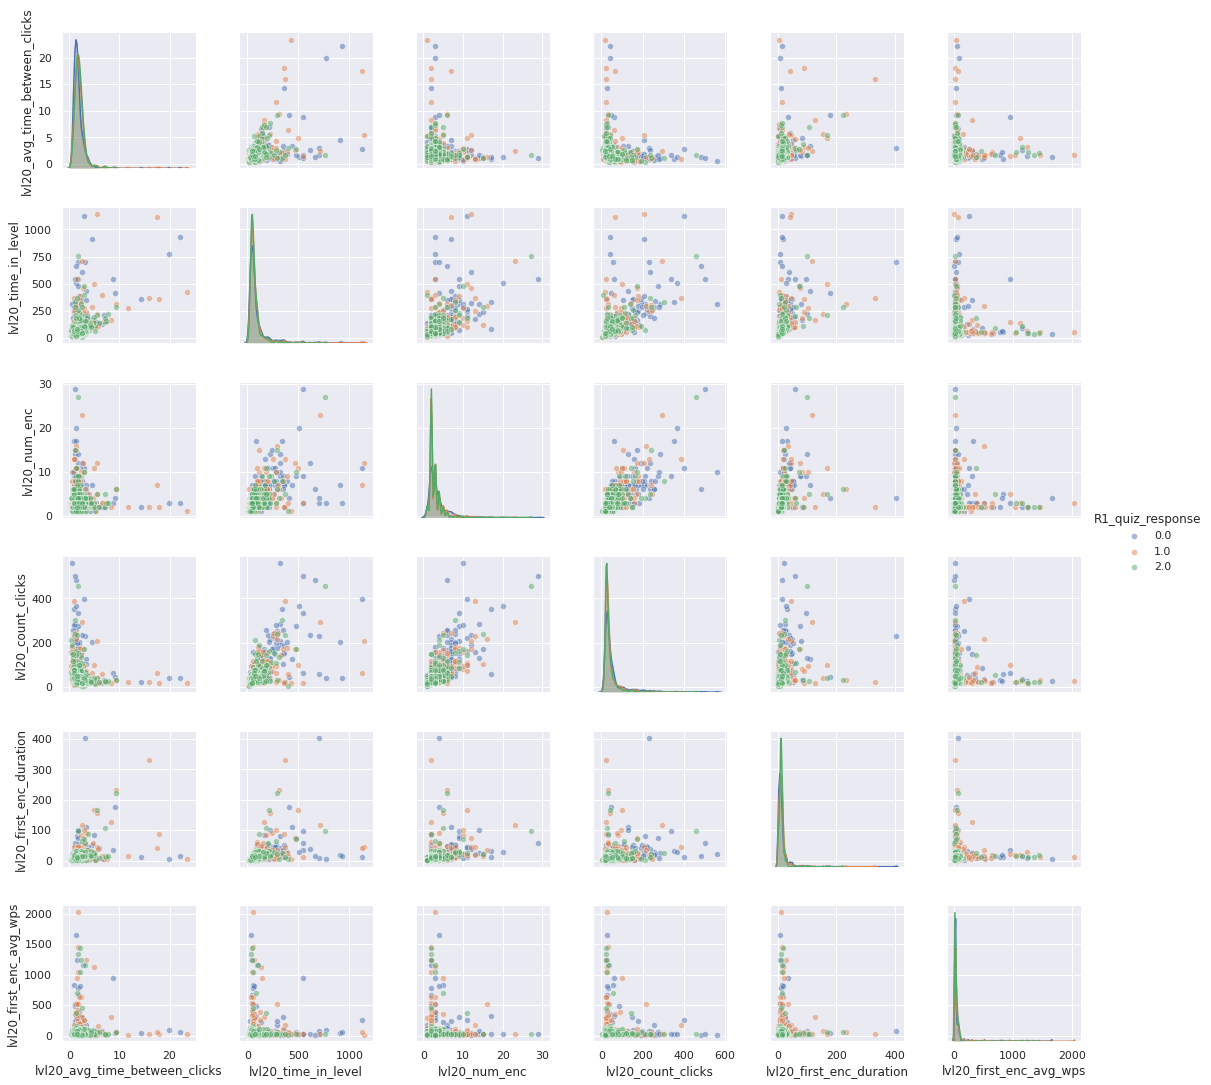

In [86]:
use_cols = [f'{prefix}{x}' for x in [
                'avg_time_between_clicks', 'time_in_level', 'num_enc',
                'count_clicks', 'first_enc_duration', 'first_enc_avg_wps',
                ]]
sns.pairplot(sampled_XY, hue='R1_quiz_response', vars=use_cols, plot_kws={'alpha': .5})

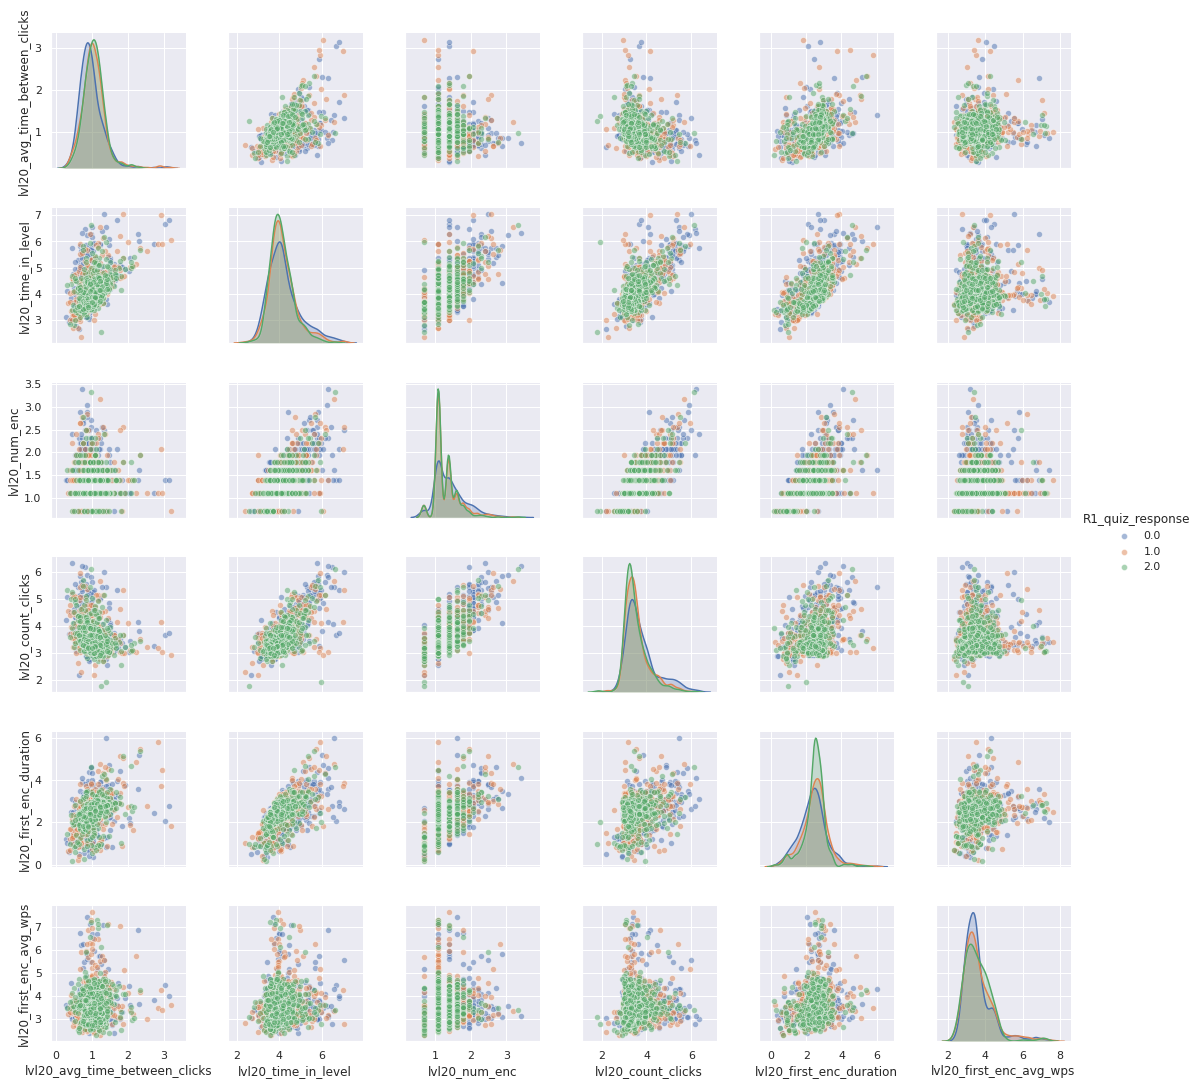

In [87]:
sns.pairplot(log_sampled_XY, hue='R1_quiz_response', vars=use_cols, plot_kws={'alpha': .5})

In [ ]:
np.log1p(X)

lvl7_EventCount  lvl7_avg_time_between_clicks  \
sessionID                                                          
19110000090781600         4.317488                      2.380623   
19110008122038204         3.912023                      1.111426   
19110008501053136         4.077537                      0.873598   
19110009114094480         4.043051                      1.049706   
19110009240104090         4.615121                      0.782110   
...                            ...                           ...   
20050621043538660         4.110874                      0.936248   
20050621060100704         4.219508                      0.521564   
20050622050615504         4.454347                      1.086870   
20050623091682920         5.267858                      0.961183   
20050623142103304         4.948760                      0.653760   

                   lvl7_count_clicks  lvl7_count_hovers  \
sessionID                                                 
19110000090781600           3.931826           3.218876   
19110008122038204           3.496508           2.890372   
19110008501053136           3.637586           3.091042   
19110009114094480           3.637586           2.995732   
19110009240104090           4.615121           0.000000   
...                              ...                ...   
20050621043538660           3.784190           2.890372   
20050621060100704           3.931826           2.890372   
20050622050615504           3.912023           3.610918   
20050623091682920           5.056246           3.637586   
20050623142103304           4.718499           3.401197   

                   lvl7_count_notebook_uses  lvl7_first_enc_avg_tbps  \
sessionID                                                              
19110000090781600                  0.000000                 2.404736   
19110008122038204                  0.000000                 1.514136   
19110008501053136                  0.000000                 1.398286   
19110009114094480                  0.000000                 1.925131   
19110009240104090                  0.693147                 2.094344   
...                                     ...                      ...   
20050621043538660                  1.098612                 1.208029   
20050621060100704                  0.693147                 1.386717   
20050622050615504                  0.000000                 1.487834   
20050623091682920                  1.098612                 1.748014   
20050623142103304                  1.098612                 1.422730   

                   lvl7_first_enc_avg_wps  lvl7_first_enc_duration  \
sessionID                                                            
19110000090781600                4.296495                 5.857124   
19110008122038204                3.130995                 3.324532   
19110008501053136                3.026645                 2.814210   
19110009114094480                3.199613                 3.232384   
19110009240104090                4.145179                 3.181838   
...                                   ...                      ...   
20050621043538660                2.794714                 3.167835   
20050621060100704                3.019010                 2.451781   
20050622050615504                3.214765                 3.139746   
20050623091682920                3.511801                 4.604370   
20050623142103304                2.966653                 3.402996   

                   lvl7_first_enc_var_tbps  lvl7_first_enc_var_wps  \
sessionID                                                            
19110000090781600                 5.897516               10.227291   
19110008122038204                 1.934988                5.290816   
19110008501053136                 2.957773                6.823858   
19110009114094480                 4.922449                6.399014   
19110009240104090                 5.485610               10.117340   
...                         

In [ ]:
logX = X.transform(np.log1p)

## Scratch

In [ ]:
dataset_path, dname = (r"G:\My Drive\Field Day\Research and Writing Projects\2019 Using Jo Wilder to Predict English Language Skill\Colab\Output Data\JM_202006251335_obj12-_thresh10_10.csv", 
    "obj12-")
classifier, cname = (LogisticRegressionCV(n_jobs=-1,scoring='f1',penalty='l2',solver='saga'), 'LogisticRegressionCV_auc_l2')
sampler, sname = (EditedNearestNeighbours(n_jobs=-1), 'ENN')

test_worker = MainClass(csv_fpath=dataset_path)
test_worker.set_y('y1_bin_x')
# clf = test_worker.run_fit(classifier=classifier, sampler=sampler, verbose=False)

In [ ]:
test_worker.f1_auc()

(0.96, 0.7314789152326001)

In [ ]:
test_worker.classification_report()

              precision    recall  f1-score   support

         0.0       0.25      0.03      0.06       215
         1.0       0.93      0.99      0.96      2769

    accuracy                           0.92      2984
   macro avg       0.59      0.51      0.51      2984
weighted avg       0.88      0.92      0.89      2984



In [ ]:
classifier, cname = (XGBClassifier(), 'XGBClassifier')
sampler, sname = (RandomUnderSampler(random_state=0), 'RandomUnderSampler')
clf = test_worker.run_fit(classifier=classifier, sampler=sampler, verbose=False)

In [ ]:
test_worker.f1_auc()

(0.24189723320158102, 0.7655504883804918)

In [ ]:
test_worker.classification_report()

              precision    recall  f1-score   support

         0.0       0.15      0.71      0.24       215
         1.0       0.97      0.68      0.80      2769

    accuracy                           0.68      2984
   macro avg       0.56      0.69      0.52      2984
weighted avg       0.91      0.68      0.76      2984



#### Try Adjusting Logistic CV Scorer

In [ ]:
d = {
    -1: 0,
        1: 1
}
def pos_neg_to_bin(labels):
    return [d[l] for l in labels]

def scorer(estimator, X, y):
    y_bin = pos_neg_to_bin(y)
    y_pred = estimator.predict(X)
    y_pred_bin = pos_neg_to_bin(y_pred)
    # print(Counter(y_pred), Counter(y),Counter(y_pred_bin), Counter(y_bin))
    return f1_score(y_true=y_bin, y_pred=y_pred_bin, pos_label=0)

classifier, cname = (LogisticRegressionCV(scoring=scorer,penalty='l2',solver='saga', n_jobs=-1), 'LogisticRegressionCV_auc_l2')
clf = test_worker.run_fit(classifier=classifier, sampler=None, verbose=False)

C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\johnm\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

In [ ]:
Counter(list(test_worker.cur_model.predict(test_worker.X_test)))

Counter({1.0: 2961, 0.0: 23})

In [ ]:
worker2.X_train

Q0_A1_time Q0_A2  Q0_A2_time Q0_A3  Q0_A3_time  \
sessionID                                                           
20030311392490840       4.197     0       0.000     0       0.000   
20040115332926616      13.516     C       5.599     B       3.783   
20040409130048670       6.371     0       0.000     0       0.000   
20020110065489270       9.744     D       5.980     B       7.963   
20020418280524776      13.452     0       0.000     0       0.000   
...                       ...   ...         ...   ...         ...   
20030410465123676      12.037     D       5.191     D       5.275   
20040414165014790      10.308     B      12.821     0       0.000   
20020222143258756      26.499     0       0.000     0       0.000   
20030509174870908       4.606     0       0.000     0       0.000   
19110308063432964      12.388     D       5.729     C       5.594   

                   Q0_num_guesses  Q1_A1_time  Q1_num_guesses  Q2_A1_time  \
sessionID                                                                   
20030311392490840             1.0       3.829             1.0       0.000   
20040115332926616             3.0       5.267             1.0       0.000   
20040409130048670             1.0       2.925             1.0       0.000   
20020110065489270             3.0       4.081             1.0       0.000   
20020418280524776             1.0       6.398             1.0       0.000   
...                           ...         ...             ...         ...   
20030410465123676             5.0       3.851             1.0       5.099   
20040414165014790             2.0      13.655             1.0       0.000   
20020222143258756             1.0       2.516             3.0       1.500   
20030509174870908             1.0       3.584             1.0       0.000   
19110308063432964             4.0       3.980             1.0       6.091   

                   Q2_num_guesses  ...  obj2_onext_int_other  \
sessionID                          ...                         
20030311392490840             0.0  ...                     0   
20040115332926616             0.0  ...                     0   
20040409130048670             0.0  ...                     0   
20020110065489270             0.0  ...                     0   
20020418280524776             0.0  ...                     0   
...                           ...  ...                   ...   
20030410465123676             1.0  ...                     1   
20040414165014790             0.0  ...                     1   
20020222143258756             1.0  ...                     0   
20030509174870908             0.0  ...                     0   
19110308063432964             1.0  ...                     0   

                  obj3_onext_int_other  obj4_onext_int_other  \
sessionID                                                      
20030311392490840                    0                     0   
20040115332926616                    0                     0   
20040409130048670                    0                     0   
20020110065489270                    0                     0   
20020418280524776                    0                     0   
...                                ...                   ...   
20030410465123676                    0                     0   
20040414165014790                    0                     0   
20020222143258756                    0                     0   
20030509174870908                    0                     0   
19110308063432964                    0                     0   

                   obj5_onext_int_other  obj6_onext_int_other  \
sessionID                                                       
20030311392490840                     0                     0   
20040115332926616                     0                     0   
20040409130048670                     0                     0   
20020110065489270                     0                     0   
20020418280524776                     0                     0  

In [ ]:
print(os.getcwd())

C:\


In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

              precision    recall  f1-score   support

         0.0       0.33      0.47      0.38       287
         1.0       0.82      0.72      0.77       989

    accuracy                           0.66      1276
   macro avg       0.58      0.59      0.58      1276
weighted avg       0.71      0.66      0.68      1276

dimension y_prob: (1276,)
dimension y_test: (1276,)
Predicts: Counter({1.0: 866, 0.0: 410})
True Labels: Counter({1.0: 989, 0.0: 287})


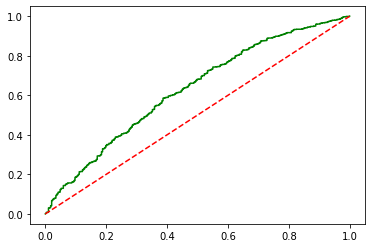

ROC-AUC Score: 0.6279615843970081


In [ ]:
worker.classification_report()
worker.model_stats(graph=True)

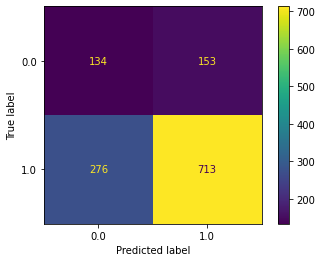

In [ ]:
plot_confusion_matrix(worker.cur_model, worker.X_test, worker.y_test, values_format='d')

## Model Inspection

In [5]:
model_name = 'withUnreached_onlyNonnative_obj76-thresh1_y2_bin_0v123_C0-02_LogisticRegressionCV_auc_l2_RandomOverSampler_y2_bin_0v123'
model_name = 'withUnreached_obj43-thresh10_y1_bin_0v12_customC_LogisticRegressionCV_auc_l2_RandomOverSampler_y1_bin_0v12'
model, X, y = feat_util.load_model(f'Output Models/{model_name}.sav')

In [6]:
Xraw = df.loc[X.index, :]
logreg = model[-1]

In [7]:
# coef_df = pd.DataFrame(logreg.coef_.ravel(), columns=X.columns)

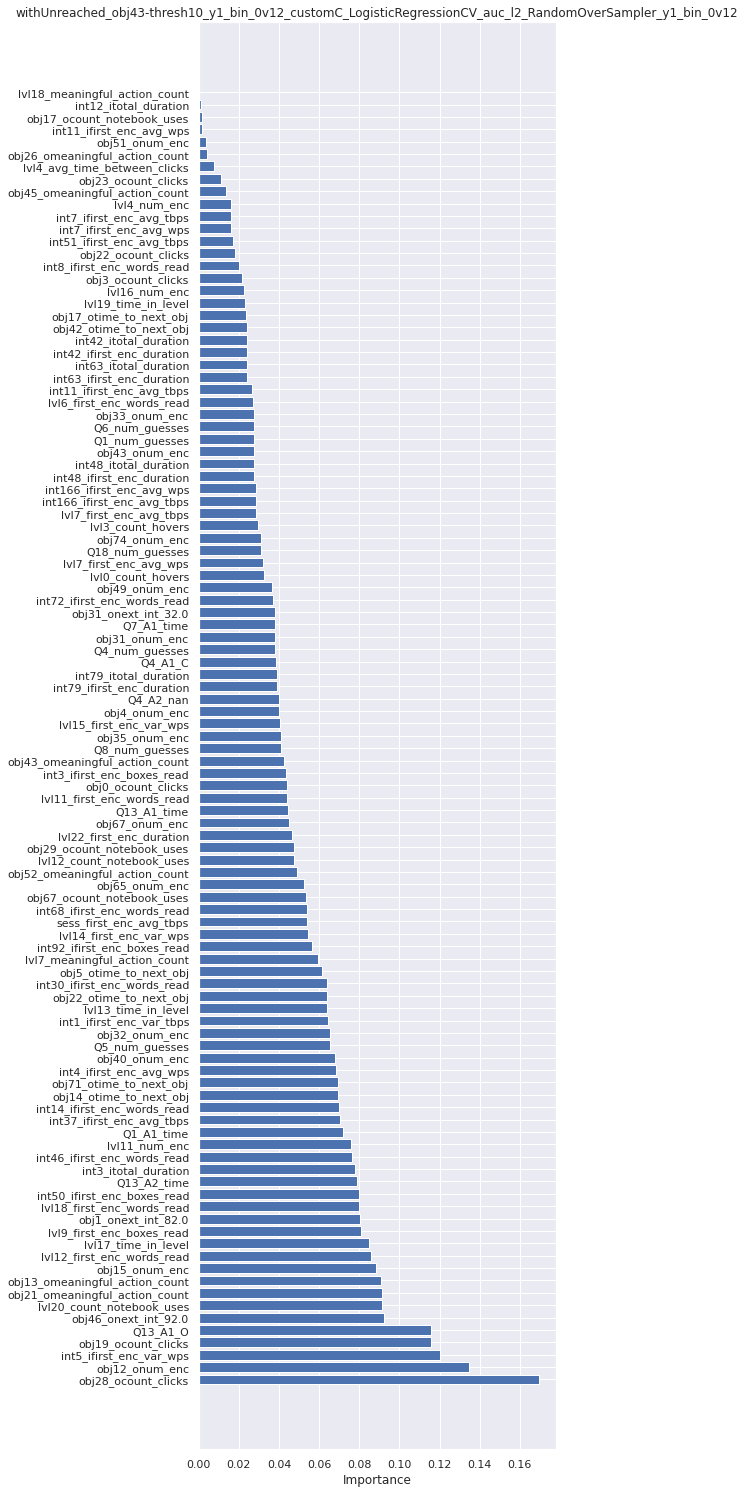

In [8]:
CHART_SIZE_FACTOR = 10 
def FeatureSuggestionPlot(features, importances, title):
  fig = plt.figure(figsize=[6.4, len(importances)*(CHART_SIZE_FACTOR/10)/4])
  ax = fig.subplots()
  y_pos = np.arange(len(features))
  ax.barh(y_pos, importances, align='center')
  ax.set_yticks(y_pos)
  ax.set_yticklabels(features)
  ax.set_xlabel("Importance")
  ax.set_title(title)
  fig.show()
# [(x,y),(x,y)]
# [x,x],[y,y]
cols, coefs = zip(*list(sorted(zip(X.columns, np.abs(logreg.coef_.ravel())), key=lambda x:x[1], reverse=True)))
FeatureSuggestionPlot(cols, coefs, title=model_name)

In [9]:
cols

('obj28_ocount_clicks',
 'obj12_onum_enc',
 'int5_ifirst_enc_var_wps',
 'obj19_ocount_clicks',
 'Q13_A1_O',
 'obj46_onext_int_92.0',
 'lvl20_count_notebook_uses',
 'obj21_omeaningful_action_count',
 'obj13_omeaningful_action_count',
 'obj15_onum_enc',
 'lvl12_first_enc_words_read',
 'lvl17_time_in_level',
 'lvl9_first_enc_boxes_read',
 'obj1_onext_int_82.0',
 'lvl18_first_enc_words_read',
 'int50_ifirst_enc_boxes_read',
 'Q13_A2_time',
 'int3_itotal_duration',
 'int46_ifirst_enc_words_read',
 'lvl11_num_enc',
 'Q1_A1_time',
 'int37_ifirst_enc_avg_tbps',
 'int14_ifirst_enc_words_read',
 'obj14_otime_to_next_obj',
 'obj71_otime_to_next_obj',
 'int4_ifirst_enc_avg_wps',
 'obj40_onum_enc',
 'Q5_num_guesses',
 'obj32_onum_enc',
 'int1_ifirst_enc_var_tbps',
 'lvl13_time_in_level',
 'obj22_otime_to_next_obj',
 'int30_ifirst_enc_words_read',
 'obj5_otime_to_next_obj',
 'lvl7_meaningful_action_count',
 'int92_ifirst_enc_boxes_read',
 'lvl14_first_enc_var_wps',
 'sess_first_enc_avg_tbps',
 'int6

In [10]:
coefs

(0.1693825063571739,
 0.13491334438397926,
 0.12039696980303455,
 0.1157044603718013,
 0.11550982408919343,
 0.0924296421831462,
 0.0915866211371792,
 0.09155369988488601,
 0.09079251106761033,
 0.08815962416107645,
 0.08578733788487812,
 0.08478642080824192,
 0.08089748646252014,
 0.08041254693286248,
 0.07997756207710752,
 0.07981884613033896,
 0.07899407952936735,
 0.07799382955225204,
 0.07621026218913504,
 0.07569556877570092,
 0.07195676991930737,
 0.07036708512243987,
 0.07000427183615066,
 0.06944754016640174,
 0.06936855619411782,
 0.06843527656737329,
 0.0679636784743256,
 0.06560981017458668,
 0.06560981017458668,
 0.06451542229143806,
 0.06408852607475982,
 0.06384729572361958,
 0.06380884657011926,
 0.06140022533769559,
 0.05961036062849731,
 0.05630311324836764,
 0.05444727163006371,
 0.0541413426457007,
 0.05397884919399548,
 0.053638700285371384,
 0.05253578411410292,
 0.04897661775529399,
 0.04737645901614564,
 0.04737645901614564,
 0.04636600183420159,
 0.044988174352

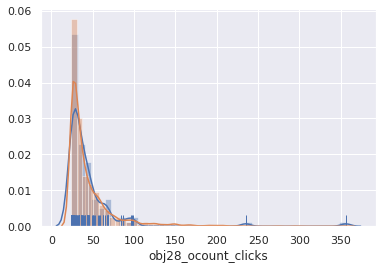

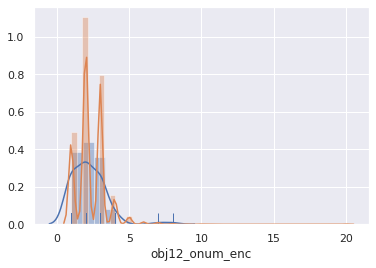

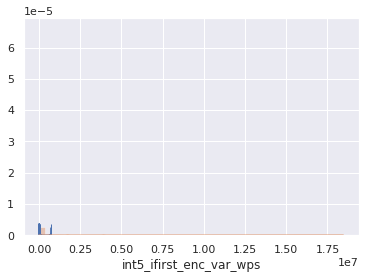

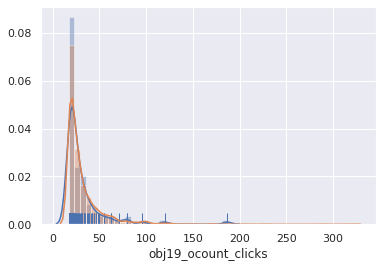

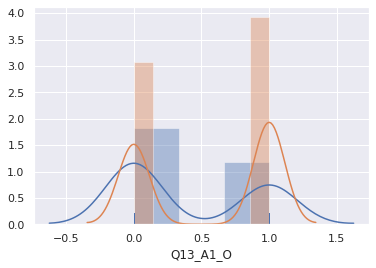

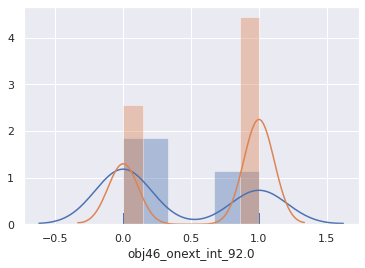

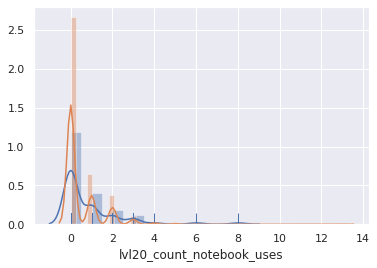

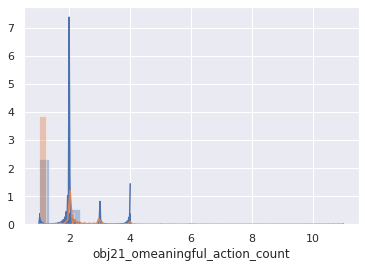

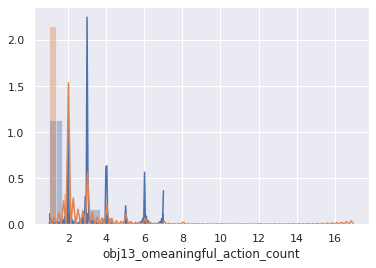

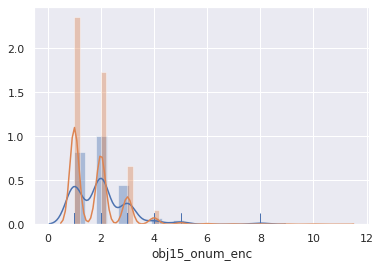

In [14]:
# interested in notebook cts for o22, o47, o62, o18
# sampler =  RandomUnderSampler(random_state=1,)
# sampled_X, _ = sampler.fit_sample(X,Y[sampling_label])
# sampled_X = X.iloc[sampler.sample_indices_,:]
# sampled_Y = Y.iloc[sampler.sample_indices_,:]
# XY = WS.join_XY(X, Y)
# log_XY = WS.join_XY(np.log1p(X),Y)
# sampled_XY = WS.join_XY(sampled_X, sampled_Y)
# log_sampled_XY = WS.join_XY(np.log1p(sampled_X),sampled_Y)

logXraw = np.log1p(Xraw)
high_cols = cols[:10]
# cols = [f'obj{n}_ocount_notebook_uses' for n in [18,22,47,62]]+['sess_end_obj']
tdf0 = Xraw.loc[y==0, high_cols]
tdf1 = Xraw.loc[y==1, high_cols]
tdf = Xraw.loc[:,high_cols]
tdf['R2'] = y
# sns.pairplot(tdf, hue='R2')

for n in range(len(high_cols)):
    sns.distplot(tdf0.iloc[:,n], rug=True)
    sns.distplot(tdf1.iloc[:,n])
    plt.show()

In [15]:
display(tdf0.describe())
display(tdf1.describe())

obj28_ocount_clicks  obj12_onum_enc  int5_ifirst_enc_var_wps  \
count            97.000000       97.000000                97.000000   
mean             45.268041        2.216495              9858.675904   
std              41.378969        1.192221             73802.745497   
min              24.000000        1.000000                12.051822   
25%              27.000000        1.000000               132.572320   
50%              34.000000        2.000000               269.206691   
75%              46.000000        3.000000              1120.789184   
max             356.000000        8.000000            724466.662917   

       obj19_ocount_clicks   Q13_A1_O  obj46_onext_int_92.0  \
count            97.000000  97.000000             97.000000   
mean             31.329897   0.391753              0.381443   
std              23.846611   0.490678              0.488264   
min              17.000000   0.000000              0.000000   
25%              19.000000   0.000000              0.000000   
50%              23.000000   0.000000              0.000000   
75%              33.000000   1.000000              1.000000   
max             187.000000   1.000000              1.000000   

       lvl20_count_notebook_uses  obj21_omeaningful_action_count  \
count                  64.000000                       97.000000   
mean                    0.859375                        1.288660   
std                     1.499917                        0.611671   
min                     0.000000                        1.000000   
25%                     0.000000                        1.000000   
50%                     0.000000                        1.000000   
75%                     1.000000                        1.000000   
max                     8.000000                        4.000000   

       obj13_omeaningful_action_count  obj15_onum_enc  
count                       97.000000       97.000000  
mean                         1.628866        2.030928  
std                          1.277364        1.103532  
min                          1.000000        1.000000  
25%                          1.000000        1.000000  
50%                          1.000000        2.000000  
75%                          1.000000        2.000000  
max                          7.000000        8.000000

obj28_ocount_clicks  obj12_onum_enc  int5_ifirst_enc_var_wps  \
count          2006.000000     2006.000000             2.006000e+03   
mean             45.103689        2.350449             1.513689e+05   
std              30.822737        1.100133             1.285601e+06   
min              24.000000        1.000000             6.670840e+00   
25%              28.000000        2.000000             1.482721e+02   
50%              34.000000        2.000000             4.207520e+02   
75%              50.000000        3.000000             2.458524e+03   
max             355.000000       20.000000             1.845808e+07   

       obj19_ocount_clicks     Q13_A1_O  obj46_onext_int_92.0  \
count          2006.000000  2006.000000           2006.000000   
mean             32.326022     0.560319              0.634098   
std              23.422657     0.496472              0.481802   
min              17.000000     0.000000              0.000000   
25%              19.000000     0.000000              0.000000   
50%              24.000000     1.000000              1.000000   
75%              36.000000     1.000000              1.000000   
max             321.000000     1.000000              1.000000   

       lvl20_count_notebook_uses  obj21_omeaningful_action_count  \
count                1464.000000                     2006.000000   
mean                    0.512295                        1.161017   
std                     0.964786                        0.528014   
min                     0.000000                        1.000000   
25%                     0.000000                        1.000000   
50%                     0.000000                        1.000000   
75%                     1.000000                        1.000000   
max                    13.000000                       11.000000   

       obj13_omeaningful_action_count  obj15_onum_enc  
count                     2006.000000     2006.000000  
mean                         1.424227        1.799103  
std                          1.156567        1.030226  
min                          1.000000        1.000000  
25%                          1.000000        1.000000  
50%                          1.000000        2.000000  
75%                          1.000000        2.000000  
max                         17.000000       11.000000

In [13]:
# with open(f'Output Models/{model_name}_meta.txt') as f:
    # print(f.read())

In [161]:
tdf.groupby(['sess_end_obj','R2']).count()

KeyError: ignored

In [ ]:
WS.